In [200]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
%matplotlib inline
#dummy variables = pandas one hot encoding
#dictonaries to pd dataframes
#relationship between x and y(revenue)
#pandas dict to df

In [201]:
test=pd.read_csv('input/test.csv')

In [202]:
train=pd.read_csv('input/train.csv')

In [203]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [204]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Data Description id - Integer unique id of each movie

belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. 

budget:Budget of a movie in dollars. 0 values mean unknown.

genres : Contains all the Genres Name & TMDB Id in JSON Format

homepage - Contains the official homepage URL of a movie. 

imdb_id - IMDB id of a movie (string). 

original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

overview - Brief description of the movie.

popularity - Popularity of the movie in float.

poster_path - Poster path of a movie. 

production_companies - All production company name and TMDB id in JSON format of a movie.

production_countries - Two digit code and full name of the production company in JSON format.

release_date - Release date of a movie in mm/dd/yy format.

runtime - Total runtime of a movie in minutes (Integer).

spoken_languages - Two digit code and full name of the spoken language.

status - Is the movie released or rumored?

tagline - Tagline of a movie

title - English title of a movie

Keywords - TMDB Id and name of all the keywords in JSON format.

cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

revenue - Total revenue earned by a movie in dollars.

In [205]:
test.shape

(4398, 22)

In [206]:
train.shape

(3000, 23)

In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [209]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0066011,en,Hot Pursuit,Rudy grew up in a steel mill town where most p...,NaN,/g8BxtvxvfbiM1UsJUyFjqeygrye.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Ghost,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe4db79251416c9111f78f', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [210]:
train.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [211]:
train['dataset']='train'
test['dataset']='test'
master=train.append(test, sort=False)
master.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,dataset
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,/i8FEQy5IWAqOzXm4uDHy2r3Swym.jpg,"[{'name': 'Intermedia Films', 'id': 763}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de...",NaN,test
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,/oZDbFtTnTwW5GSfyaGFGaYxDBgD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/20/04,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The call of the wild, the thrill of adventure....",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre...","[{'credit_id': '52fe43b29251416c7501a909', 'de...",NaN,test
4395,7396,NaN,16000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0084855,en,The Verdict,"Frank Galvin is a down-on-his luck lawyer, red...",9.596883,/hh9sIE1PT7Pjq3n2fzHNEHh8Ogq.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/8/82,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The doctors want to settle, the Church wants t...",The Verdict,"[{'id': 1680, 'name': 'boston'}, {'id': 6148, ...","[{'cast_id': 1, 'character': 'Frank Galvin', '...","[{'credit_id': '52fe448bc3a368484e028c55', 'de...",NaN,test
4396,7397,NaN,2000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,tt3235888,en,It Follows,"For 19-year-old Jay, fall should be about scho...",20.359336,/4MrwJZr0R9LbyOgZqwLNmtzzxbu.jpg,"[{'name': 'Northern Lights Films', 'id': 8714}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/4/15,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"It doesn't think, it doesn't feel, it doesn't ...",It Follows,"[{'id': 3713, 'name': 'chase'}, {'id': 6152, '...","[{'cast_id': 1, 'character': 'Jay Height', 'cr...","[{'credit_id': '537770b20e0a261431002299', 'de...",NaN,test
4397,7398,NaN,64000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0056663,fr,Vivre sa vie: film en douze tableaux,Twelve episodic tales in the life of a Parisia...,11.305910,/baz1c9dzsf5uhNuUYhXy7eudNJd.jpg,"[{'name': 'Pathé Consortium Cinéma', 'id': 220...","[{'iso_3166_1': 'FR', 'name': 'France'}]",9/20/62,85.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,The many faces of a woman trying to find herse...,Vivre Sa Vie,"[{'id': 90, 'name': 'paris'}, {'id': 490, 'nam...","[{'cast_id': 8, 'character': 'Nana Kleinfranke...","[{'credit_id': '52fe4306c3a36847f80349a5', 'de...",NaN,test


In [212]:
#belongs_to_collection

for i, e in enumerate(master['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


In [213]:
import ast
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

#access the dictionaries
def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(master)
for col in dict_columns:
       master[col]=dfx[col]
        
# dfy = text_to_dict(test)
# for col in dict_columns:
#        test[col]=dfy[col]

In [214]:
master['belongs_to_collection'].apply(lambda x:len(x) if x!= {} else 0).value_counts()

0    5917
1    1481
Name: belongs_to_collection, dtype: int64

In [215]:
master['collection_name'] = master['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
master['has_collection'] = master['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
# test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
# test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

master = master.drop(['belongs_to_collection'], axis=1)
# test = test.drop(['belongs_to_collection'], axis=1)

In [216]:
master.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,dataset,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,train,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,train,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,train,0,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,train,0,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,train,0,0


In [217]:
#genres

for i, e in enumerate(master['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [218]:
print('Number of genres in films')
master['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    2379
3    2208
1    1488
4     967
5     280
6      48
0      23
7       4
8       1
Name: genres, dtype: int64

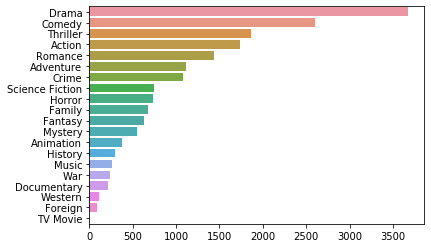

In [219]:
genre=master['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in genre for i in j]).most_common(20)
sns.barplot([val[1] for val in count],[val[0] for val in count])

In [220]:
# create columns all genres and number of genres
master['all_genres'] = master['genres'].apply(lambda x: sorted([i['name'] for i in x]) if x != {} else '')
master['num_genres']=master['genres'].apply(lambda x: len(x) if x != {} else 0)
#create dummy variables
list_of_genres = list(master['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
all_genress = list(Counter([i for j in list_of_genres for i in j]))
others_genres=list(set(all_genress)-set(top_genres))
for g in top_genres:
    master[g] = master['all_genres'].apply(lambda x: 1 if g in x else 0)

for g in others_genres:
    master['genres_others'] = master['all_genres'].apply(lambda x: 1 if g in x else 0)
#for row in train:
#    if sum(row[25:])<row['num_genres']:
#        row['genres_others']=1
#    else: row['genres_others']=0
        
# test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
# test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_genres:
#     test[g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)
# for g in others_genres:
#     test['genres_others'] = test['all_genres'].apply(lambda x: 1 if g in x else 0)
master = master.drop(['genres','all_genres'], axis=1)
# test = test.drop(['genres','all_genres'], axis=1)

In [221]:
print(others_genres)

['Western', 'War', 'Foreign', 'Documentary', 'TV Movie']


In [222]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 41 columns):
id                      7398 non-null int64
budget                  7398 non-null int64
homepage                2366 non-null object
imdb_id                 7398 non-null object
original_language       7398 non-null object
original_title          7398 non-null object
overview                7376 non-null object
popularity              7398 non-null float64
poster_path             7396 non-null object
production_companies    7398 non-null object
production_countries    7398 non-null object
release_date            7397 non-null object
runtime                 7392 non-null float64
spoken_languages        7398 non-null object
status                  7396 non-null object
tagline                 5938 non-null object
title                   7395 non-null object
Keywords                7398 non-null object
cast                    7398 non-null object
crew                    7398 non-null 

In [223]:
#production companies
for i, e in enumerate(master['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [224]:
print('Number of production companies in films')
master['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies in films


1     1905
2     1786
3     1373
4      785
5      430
0      414
6      295
7      156
8       91
9       74
11      24
10      22
12       8
16       8
13       6
14       5
19       3
15       3
17       2
18       2
21       2
24       1
20       1
22       1
26       1
Name: production_companies, dtype: int64

In [225]:
master['all_pd_com'] = master['production_companies'].apply(lambda x: sorted([i['name'] for i in x]) if x != {} else '')
master['num_pd_com']=master['production_companies'].apply(lambda x: len(x) if x != {} else 0)
#create dummy variables
list_of_companies = list(master['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
all_pd_coms = list(Counter([i for j in list_of_companies for i in j]))
others_pd_com=list(set(all_pd_coms)-set(top_companies))

for g in top_companies:
    master['pd_com_' + g] = master['all_pd_com'].apply(lambda x: 1 if g in x else 0)
for g in others_pd_com:
    master['pd_com_others'] = master['all_pd_com'].apply(lambda x: 1 if g in x else 0)
    

# test['all_pd_com'] = test['production_companies'].apply(lambda x: sorted([i['name'] for i in x]) if x != {} else '')
# test['num_pd_com']=test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
# #create dummy variables

# for g in top_companies:
#     test['pd_com_' + g] = test['all_pd_com'].apply(lambda x: 1 if g in x else 0)
# for g in others_pd_com:
#     test['pd_com_others'] = test['all_pd_com'].apply(lambda x: 1 if g in x else 0)
        
# #train['all_pd_com'].str.join(sep='*').str.get_dummies(sep='*')
# #train = pd.concat([train.drop('production_companies', axis=1), train['all_pd_com'].str.join(sep='*').str.get_dummies(sep='*')], axis=1)
# #train.info()
master = master.drop(['production_companies', 'all_pd_com'], axis=1)
#test = test.drop(['production_companies', 'all_pd_com'], axis=1)

In [226]:
# production countries 
for i, e in enumerate(master['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [227]:
print('Number of production countries in films')
master['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


1     5464
2     1227
3      361
0      157
4      128
5       42
6       11
8        3
9        2
7        1
10       1
12       1
Name: production_countries, dtype: int64

In [228]:
list_of_countries = list(master['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 5617),
 ('United Kingdom', 917),
 ('France', 570),
 ('Germany', 411),
 ('Canada', 323),
 ('India', 220),
 ('Italy', 160),
 ('Japan', 157),
 ('Australia', 148),
 ('Spain', 139),
 ('Russia', 132),
 ('China', 99),
 ('Hong Kong', 96),
 ('Belgium', 64),
 ('Ireland', 62),
 ('South Korea', 58),
 ('Sweden', 50),
 ('Mexico', 44),
 ('Netherlands', 43),
 ('Denmark', 40),
 ('New Zealand', 37),
 ('Czech Republic', 30),
 ('Switzerland', 26),
 ('South Africa', 24),
 ('Brazil', 23)]

In [229]:
master['num_pd_cnt'] = master['production_countries'].apply(lambda x: len(x) if x != {} else 0)
master['all_pd_cnt']=master['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#create dummy variables
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
all_pd_cnts = list(Counter([i for j in list_of_countries for i in j]))
others_pd_cnt=list(set(all_pd_cnts)-set(top_countries))
master['all_pd_cnt']
for g in top_countries:
    master['pd_cnt_' + g] = master['all_pd_cnt'].apply(lambda x: 1 if g in x else 0)    
for g in others_pd_cnt:
    master['pd_cnt_others'] = master['all_pd_cnt'].apply(lambda x: 1 if g in x else 0)
    
# test['num_pd_cnt'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
# test['all_pd_cnt'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_countries:
#     test['pd_cnt_' + g] = test['all_pd_cnt'].apply(lambda x: 1 if g in x else 0)
# for g in others_pd_cnt:
#     test['pd_cnt_others'] = test['all_pd_cnt'].apply(lambda x: 1 if g in x else 0)

master = master.drop(['production_countries', 'all_pd_cnt'], axis=1)
# test = test.drop(['production_countries', 'all_pd_cnt'], axis=1)

#train['all_cnt_com'][1]
#train['all_pd_cnt'].str.join(sep='*').str.get_dummies(sep='*')
#train = pd.concat([train.drop('production_countries', axis=1), train['all_pd_cnt'].str.join(sep='*').str.get_dummies(sep='*')], axis=1)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 98 columns):
id                                               7398 non-null int64
budget                                           7398 non-null int64
homepage                                         2366 non-null object
imdb_id                                          7398 non-null object
original_language                                7398 non-null object
original_title                                   7398 non-null object
overview                                         7376 non-null object
popularity                                       7398 non-null float64
poster_path                                      7396 non-null object
release_date                                     7397 non-null object
runtime                                          7392 non-null float64
spoken_languages                                 7398 non-null object
status                                           7396

In [230]:
# spoken languages
for i, e in enumerate(master['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [231]:
print('Number of spoken languages in films')
master['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    5226
2    1319
3     502
4     178
5      73
0      62
6      25
7       6
8       4
9       3
Name: spoken_languages, dtype: int64

In [232]:
list_of_languages = list(master['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 6449),
 ('Français', 711),
 ('Español', 559),
 ('Deutsch', 419),
 ('Pусский', 364),
 ('Italiano', 321),
 ('日本語', 204),
 ('普通话', 163),
 ('हिन्दी', 160),
 ('', 114),
 ('العربية', 102),
 ('Português', 100),
 ('广州话 / 廣州話', 89),
 ('한국어/조선말', 78),
 ('Polski', 69)]

In [233]:
master['num_lg'] = master['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
master['all_lg'] = master['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#create dummy variables
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
all_lgs = list(Counter([i for j in list_of_languages for i in j]))
others_lg=list(set(all_lgs)-set(top_languages))
for g in top_languages:
    master['lg_' + g] = master['all_lg'].apply(lambda x: 1 if g in x else 0)
for g in others_lg:
    master['lg_others'] = master['all_lg'].apply(lambda x: 1 if g in x else 0)

    
# test['num_lg'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
# test['all_lg'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_languages:
#     test['lg_' + g] = test['all_lg'].apply(lambda x: 1 if g in x else 0)
# for g in others_lg:
#     test['lg_others'] = test['all_lg'].apply(lambda x: 1 if g in x else 0)
    
master = master.drop(['spoken_languages', 'all_lg'], axis=1)
# test = test.drop(['spoken_languages', 'all_lg'], axis=1)
#train['all_cnt_com'][1]
# train['all_lng'].str.join(sep='*').str.get_dummies(sep='*')
#train = pd.concat([train.drop('production_countries', axis=1), train['all_pd_cnt'].str.join(sep='*').str.get_dummies(sep='*')], axis=1)
#train.head()

In [234]:
#Keywords
for i, e in enumerate(master['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [235]:
print('Number of Keywords in films')
master['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


5    722
0    669
4    602
3    588
6    585
7    495
2    467
1    452
8    389
9    337
Name: Keywords, dtype: int64

In [236]:
list_of_keywords = list(master['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
master['num_key'] = master['Keywords'].apply(lambda x: len(x) if x != {} else 0)
master['all_key'] = master['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#create dummy variables
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
all_keys = list(Counter([i for j in list_of_keywords for i in j]))
others_key=list(set(all_keys)-set(top_keywords))
for g in top_keywords:
    master['key_' + g] = master['all_key'].apply(lambda x: 1 if g in x else 0)
for g in others_key:
    master['key_others'] = master['all_key'].apply(lambda x: 1 if g in x else 0)
    
# test['num_key'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
# test['all_key'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_keywords:
#     test['key_' + g] = test['all_key'].apply(lambda x: 1 if g in x else 0)
# for g in others_key:
#     test['key_others'] = test['all_key'].apply(lambda x: 1 if g in x else 0)
    
master = master.drop(['Keywords', 'all_key'], axis=1)
# test = test.drop(['Keywords', 'all_key'], axis=1)
#train['all_cnt_com'][1]
# train['all_key'].str.join(sep='*').str.get_dummies(sep='*')
#train = pd.concat([train.drop('production_countries', axis=1), train['all_pd_cnt'].str.join(sep='*').str.get_dummies(sep='*')], axis=1)
#train.head()

In [237]:
# cast
for i, e in enumerate(master['cast'][:1]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [238]:
print('Number of casted persons in films')
master['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


15    525
16    379
12    328
11    325
13    324
10    324
17    310
8     282
9     280
14    278
Name: cast, dtype: int64

In [239]:
list_of_cast_names = list(master['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 80),
 ('Robert De Niro', 71),
 ('Bruce Willis', 62),
 ('Morgan Freeman', 61),
 ('Liam Neeson', 57),
 ('Willem Dafoe', 55),
 ('Steve Buscemi', 55),
 ('Sylvester Stallone', 54),
 ('Nicolas Cage', 54),
 ('Matt Damon', 51),
 ('J.K. Simmons', 50),
 ('John Goodman', 50),
 ('Julianne Moore', 50),
 ('Christopher Walken', 50),
 ('Robin Williams', 50)]

In [240]:
list_of_cast_genders = list(master['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()
#0 is unspecified, 1 is female, 2 is male

[(2, 69023), (0, 52020), (1, 33991)]

In [241]:
list_of_cast_characters = list(master['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 1828),
 ('Himself', 1497),
 ('Herself', 388),
 ('Dancer', 385),
 ('Additional Voices (voice)', 335),
 ('Doctor', 202),
 ('Reporter', 201),
 ('Nurse', 171),
 ('Waitress', 144),
 ('Bartender', 142),
 ('Priest', 113),
 ('Soldier', 113),
 ('Security Guard', 109),
 ('(uncredited)', 109),
 ('Cop', 108)]

In [242]:
master['num_cast'] = master['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
# all_cast_names = list(Counter([i for j in list_of_cast_names for i in j]))
# others_cast_names=list(set(all_cast_names)-set(top_cast_names))
for g in top_cast_names:
    master['cast_name_' + g] = master['cast'].apply(lambda x: 1 if g in str(x) else 0)
# for g in others_cast_names:
#     train['cast_name_others'] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
master['genders_0_cast'] = master['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
master['genders_1_cast'] = master['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
master['genders_2_cast'] = master['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
# all_cast_chr = list(Counter([i for j in list_of_cast_characters for i in j]))
# others_cast_chr=list(set(all_cast_chr)-set(top_cast_characters))
for g in top_cast_characters:
    master['cast_chr_' + g] = master['cast'].apply(lambda x: 1 if g in str(x) else 0)
# for g in others_cast_chr:
#     train['cast_chr_others'] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
# test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
# for g in top_cast_names:
#     test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
# # for g in others_cast_names:
# #     test['cast_name_others'] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
# test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
# test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
# test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

# for g in top_cast_characters:
#     test['cast_chr_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
# for g in others_cast_chr:
#     test['cast_chr_others'] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
master = master.drop(['cast'], axis=1)
# test = test.drop(['cast'], axis=1)

In [243]:
master.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,crew,revenue,dataset,collection_name,has_collection,num_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,genres_others,num_pd_com,pd_com_Warner Bros.,pd_com_Universal Pictures,pd_com_Paramount Pictures,pd_com_Twentieth Century Fox Film Corporation,pd_com_Columbia Pictures,pd_com_Metro-Goldwyn-Mayer (MGM),pd_com_New Line Cinema,pd_com_Touchstone Pictures,pd_com_Walt Disney Pictures,pd_com_Columbia Pictures Corporation,pd_com_Canal+,pd_com_TriStar Pictures,pd_com_Relativity Media,pd_com_United Artists,pd_com_Miramax Films,pd_com_Village Roadshow Pictures,pd_com_Regency Enterprises,pd_com_DreamWorks SKG,pd_com_Fox Searchlight Pictures,pd_com_Amblin Entertainment,pd_com_Lionsgate,pd_com_StudioCanal,pd_com_Working Title Films,pd_com_Dune Entertainment,pd_com_Summit Entertainment,pd_com_Dimension Films,pd_com_BBC Films,pd_com_Orion Pictures,pd_com_Hollywood Pictures,pd_com_Fox 2000 Pictures,pd_com_others,num_pd_cnt,pd_cnt_United States of America,pd_cnt_United Kingdom,pd_cnt_France,pd_cnt_Germany,pd_cnt_Canada,pd_cnt_India,pd_cnt_Italy,pd_cnt_Japan,pd_cnt_Australia,pd_cnt_Spain,pd_cnt_Russia,pd_cnt_China,pd_cnt_Hong Kong,pd_cnt_Belgium,pd_cnt_Ireland,pd_cnt_South Korea,pd_cnt_Sweden,pd_cnt_Mexico,pd_cnt_Netherlands,pd_cnt_Denmark,pd_cnt_New Zealand,pd_cnt_Czech Republic,pd_cnt_Switzerland,pd_cnt_South Africa,pd_cnt_Brazil,pd_cnt_others,num_lg,lg_English,lg_Français,lg_Español,lg_Deutsch,lg_Pусский,lg_Italiano,lg_日本語,lg_普通话,lg_हिन्दी,lg_,lg_العربية,lg_Português,lg_广州话 / 廣州話,lg_한국어/조선말,lg_Polski,lg_Latin,lg_Magyar,lg_Český,lg_ภาษาไทย,lg_தமிழ்,lg_svenska,lg_עִבְרִית,lg_Türkçe,lg_ελληνικά,lg_Dansk,lg_Nederlands,lg_اردو,lg_Română,lg_Tiếng Việt,lg_Norsk,lg_others,num_key,key_woman director,key_independent film,key_duringcreditsstinger,key_based on novel,key_murder,key_violence,key_love,key_revenge,key_sex,key_aftercreditsstinger,key_biography,key_sport,key_friendship,key_dystopia,key_police,key_suspense,key_sequel,key_nudity,key_musical,key_teenager,key_female nudity,key_drug,key_los angeles,key_new york,key_prison,key_3d,key_high school,key_family,key_alien,key_world war ii,key_others,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Bruce Willis,cast_name_Morgan Freeman,cast_name_Liam Neeson,cast_name_Willem Dafoe,cast_name_Steve Buscemi,cast_name_Sylvester Stallone,cast_name_Nicolas Cage,cast_name_Matt Damon,cast_name_J.K. Simmons,cast_name_John Goodman,cast_name_Julianne Moore,cast_name_Christopher Walken,cast_name_Robin Williams,genders_0_cast,genders_1_cast,genders_2_cast,cast_chr_,cast_chr_Himself,cast_chr_Herself,cast_chr_Dancer,cast_chr_Additional Voices (voice),cast_chr_Doctor,cast_chr_Reporter,cast_chr_Nurse,cast_chr_Waitress,cast_chr_Bartender,cast_chr_Priest,cast_chr_Soldier,cast_chr_Security Guard,cast_chr_(uncredited),cast_chr_Cop
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,train,Hot Tub Time Machine Collection,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,10,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'cr

In [244]:
# crew
for i, e in enumerate(master['crew'][:1]):
    print(i, e[:10])

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [245]:
print('Number of casted persons in films')
master['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


2     394
3     338
10    316
11    281
8     274
12    274
9     266
14    257
4     253
13    243
Name: crew, dtype: int64

In [246]:
list_of_crew_names = list(master['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 105),
 ('Steven Spielberg', 104),
 ('Robert Rodriguez', 100),
 ('Mary Vernieu', 99),
 ('Deborah Aquila', 88),
 ('Bob Weinstein', 87),
 ('Harvey Weinstein', 86),
 ('Hans Zimmer', 83),
 ('Tricia Wood', 83),
 ('James Newton Howard', 81),
 ('James Horner', 79),
 ('Luc Besson', 77),
 ('Francine Maisler', 75),
 ('Kerry Barden', 74),
 ('Jerry Goldsmith', 72)]

In [247]:
list_of_crew_jobs = list(master['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 14670),
 ('Executive Producer', 8533),
 ('Director', 8051),
 ('Screenplay', 7381),
 ('Editor', 7054),
 ('Casting', 6055),
 ('Director of Photography', 5611),
 ('Original Music Composer', 4768),
 ('Art Direction', 4637),
 ('Production Design', 4027),
 ('Costume Design', 3876),
 ('Writer', 3870),
 ('Set Decoration', 3261),
 ('Makeup Artist', 2710),
 ('Sound Re-Recording Mixer', 2257)]

In [248]:
list_of_crew_genders = list(master['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)

[(0, 103439), (2, 60731), (1, 15420)]

In [249]:
list_of_crew_departments = list(master['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

[('Production', 38927),
 ('Sound', 22497),
 ('Art', 19870),
 ('Crew', 17529),
 ('Writing', 16329),
 ('Costume & Make-Up', 15223),
 ('Camera', 13229),
 ('Directing', 12245),
 ('Editing', 11135),
 ('Visual Effects', 9472),
 ('Lighting', 3129),
 ('Actors', 5)]

In [250]:
master['num_crew'] = master['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
# all_crew_names = list(Counter([i for j in list_of_crew_names for i in j]))
# others_crew_names=list(set(all_crew_names)-set(top_crew_names))
for g in top_crew_names:
    master['crew_name_' + g] = master['crew'].apply(lambda x: 1 if g in str(x) else 0)
# for g in others_crew_names:
#     train['crew_name_others'] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)    
master['genders_0_crew'] = master['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
master['genders_1_crew'] = master['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
master['genders_2_crew'] = master['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
# all_crew_jobs = list(Counter([i for j in list_of_crew_jobs for i in j]))
# others_crew_jobs=list(set(all_crew_jobs)-set(top_crew_jobs))
for j in top_crew_jobs:
    master['jobs_' + j] = master['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
# for j in others_crew_jobs:
#     train['jobs_others'] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j])) 
    
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
# all_crew_deps = list(Counter([i for j in list_of_crew_departments for i in j]))
# others_crew_deps=list(set(all_crew_deps)-set(top_crew_departments))
for j in top_crew_departments:
    master['deps_' + j] = master['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
# for j in others_crew_deps:
#     train['deps_others'] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j]))
    
# test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
# for g in top_crew_names:
#     test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
# # for g in others_crew_names:
# #     test['crew_name_others'] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)    
    
# test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
# test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
# test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
# for j in top_crew_jobs:
#     test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
# # for j in others_crew_jobs:
# #     test['jobs_others'] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j])) 
    
# for j in top_crew_departments:
#     test['deps_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j]))
# # for j in others_crew_deps:
# #     test['deps_others'] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j]))

master = master.drop(['crew'], axis=1)
# test = test.drop(['crew'], axis=1)

In [251]:
#original_language
for i, e in enumerate(master['original_language'][:5]):
    print(i, e[:10])

0 en
1 en
2 en
3 hi
4 ko


In [252]:
master.original_language.mode(4)

0    en
dtype: object

## Data Exploration

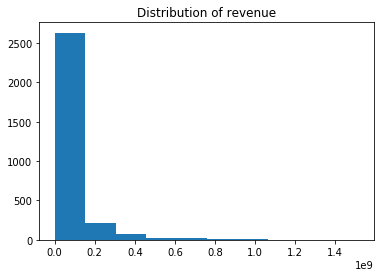

In [253]:
train_new=master[master['dataset']=='train']
#Revenue
plt.hist(train_new['revenue'])
plt.title('Distribution of revenue')
plt.show()

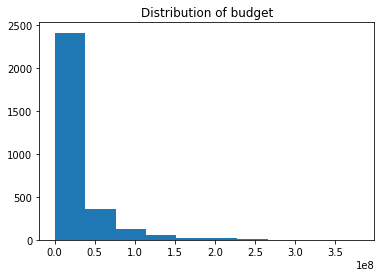

In [254]:
#Budget
plt.hist(train_new['budget'])
plt.title('Distribution of budget')
plt.show()

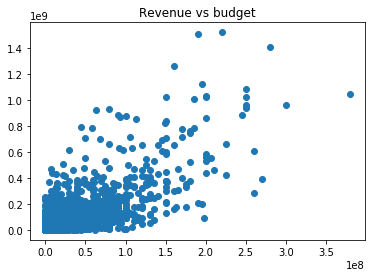

In [255]:
plt.scatter(train_new['budget'], train_new['revenue'])
plt.title('Revenue vs budget')
plt.show()

In [256]:
#Homepage
train_new['homepage'].describe()

count                                   946
unique                                  941
top       http://www.transformersmovie.com/
freq                                      4
Name: homepage, dtype: object

In [257]:
train_new['has_homepage'] = train_new['homepage'].apply(lambda x: 1 if not pd.isnull(x) else 0)

C:\Users\Brainz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


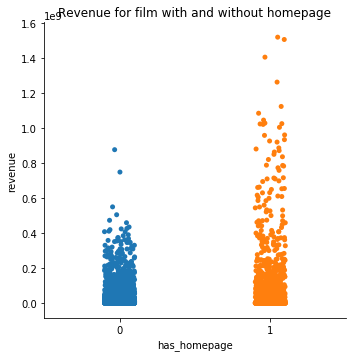

In [258]:
sns.catplot(x='has_homepage', y='revenue', data=train_new)
plt.title('Revenue for film with and without homepage')
plt.show()

In [259]:
#original_language
train_new['original_language'].describe()

count     3000
unique      36
top         en
freq      2575
Name: original_language, dtype: object

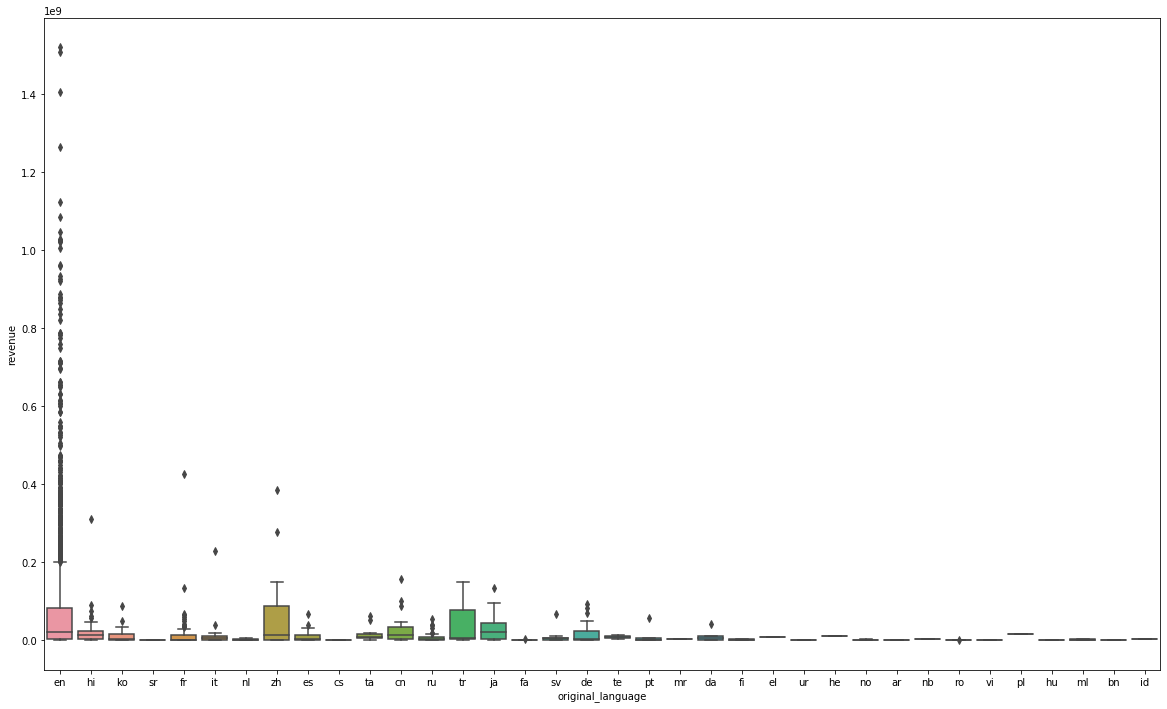

In [260]:
plt.figure(figsize=(20,12))
sns.boxplot(x='original_language', y='revenue', data=train_new)
plt.show()

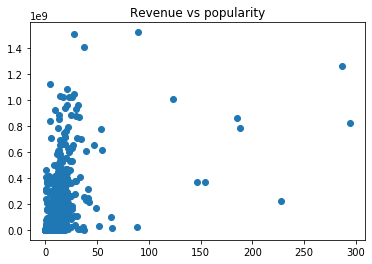

In [261]:
#popularity
plt.scatter(train_new['popularity'], train_new['revenue'])
plt.title('Revenue vs popularity')
plt.show()

In [262]:
#release_date
master.loc[master['release_date'].isnull() == True, 'release_date'] = '01/01/98'

#Since only last two digits of year are provided
master[['release_month','release_day','release_year']]=master['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why (train['release_year'] < 100) 
master.loc[ (master['release_year'] <= 19) & (master['release_year'] < 100), "release_year"] += 2000
master.loc[ (master['release_year'] > 19)  & (master['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(master['release_date']) 
master['release_dayofweek'] = releaseDate.dt.dayofweek
master['release_quarter'] = releaseDate.dt.quarter

# test[['release_month','release_day','release_year']]=test['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# test.loc[ (test['release_year'] <= 19) & (test['release_year'] < 100), "release_year"] += 2000
# test.loc[ (test['release_year'] > 19)  & (test['release_year'] < 100), "release_year"] += 1900

# releaseDate = pd.to_datetime(test['release_date']) 
# test['release_dayofweek'] = releaseDate.dt.dayofweek
# test['release_quarter'] = releaseDate.dt.quarter


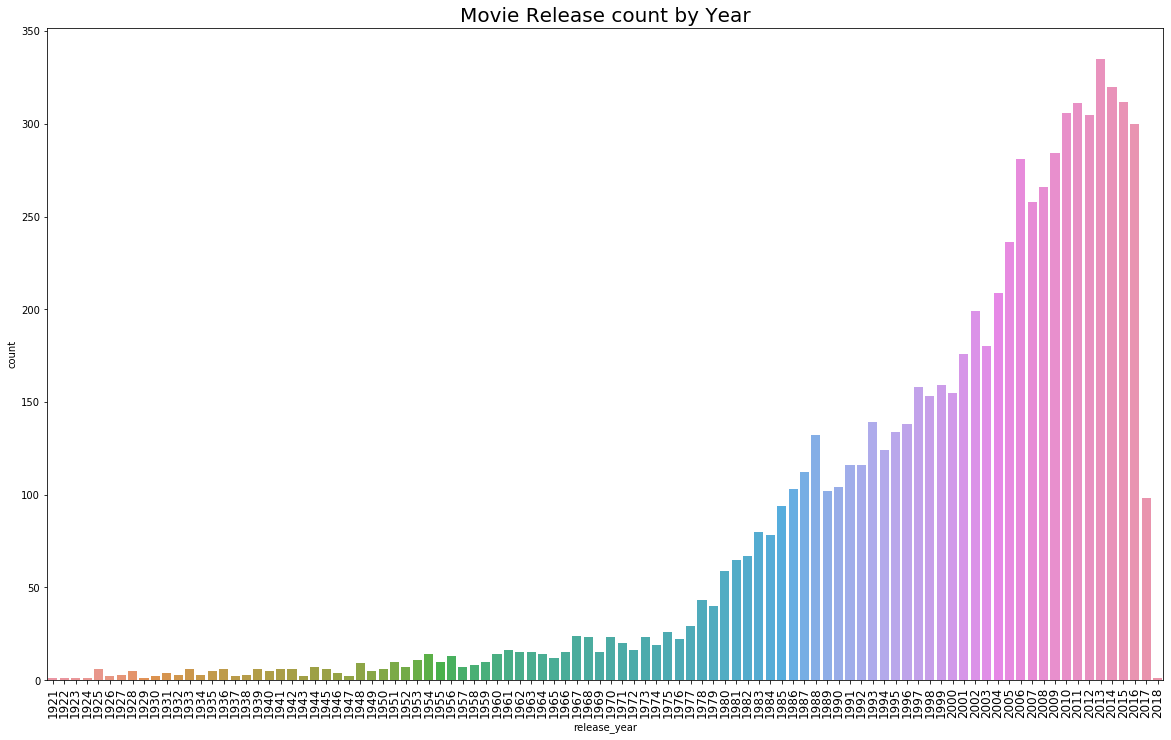

In [263]:
plt.figure(figsize=(20,12))
sns.countplot(master['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.show()

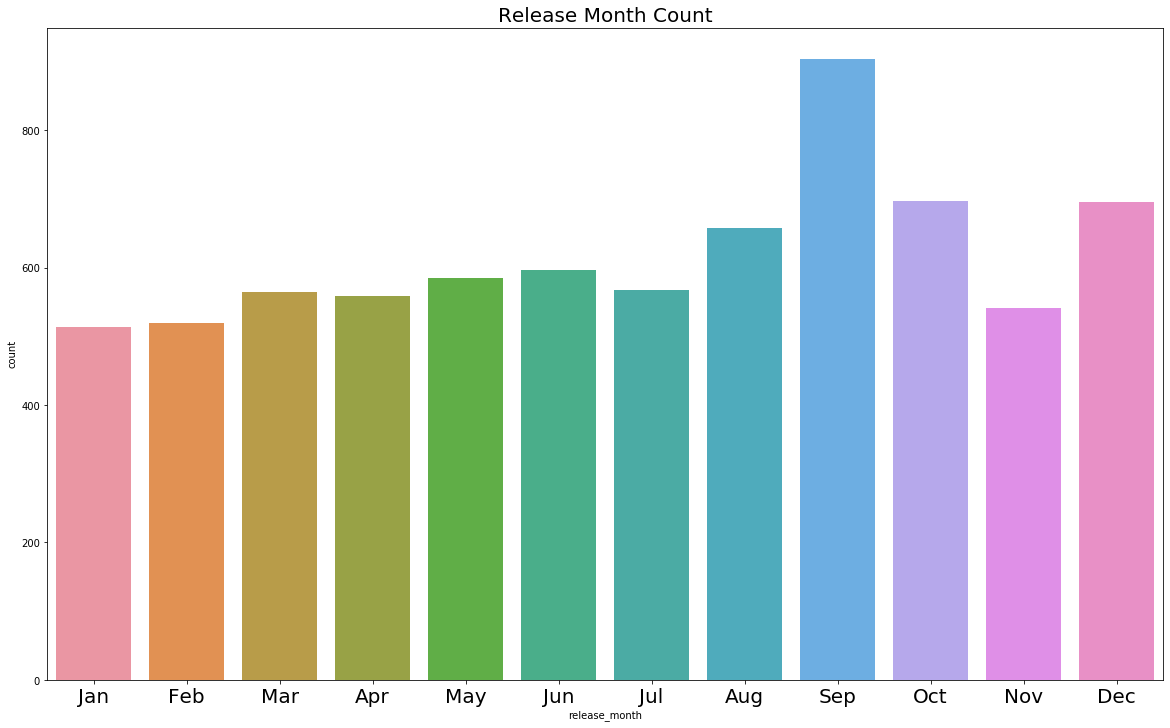

In [264]:
plt.figure(figsize=(20,12))
sns.countplot(master['release_month'].sort_values())
plt.title("Release Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

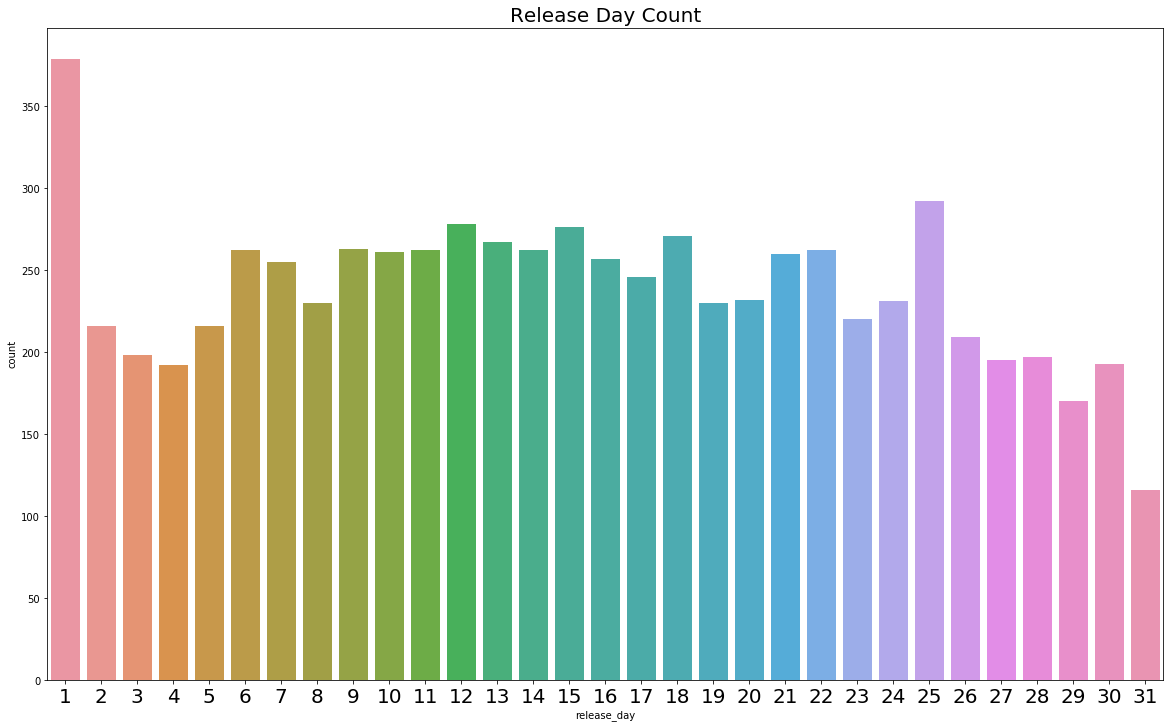

In [265]:
plt.figure(figsize=(20,12))
sns.countplot(master['release_day'].sort_values())
plt.title("Release Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

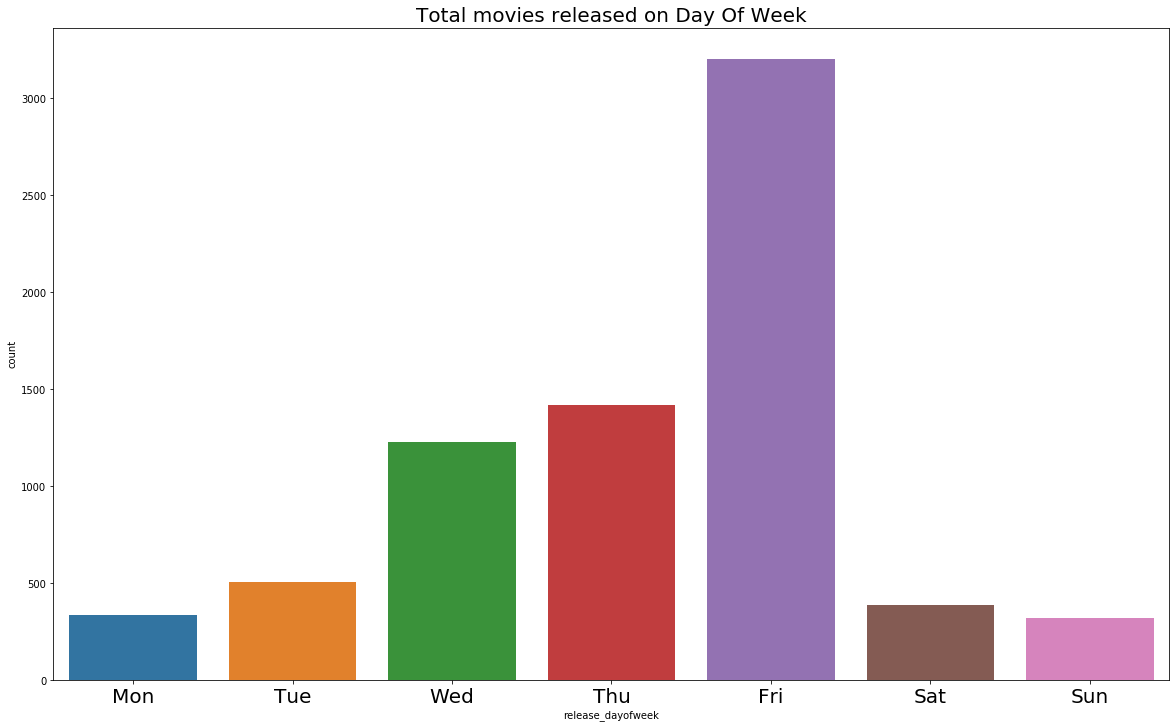

In [266]:
plt.figure(figsize=(20,12))
sns.countplot(master['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

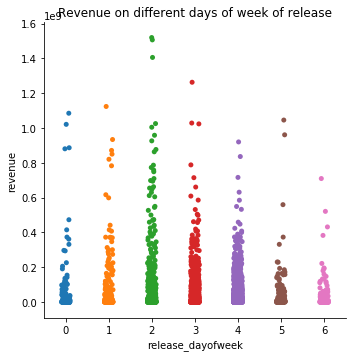

In [267]:
train_new=master[master['dataset']=='train']
sns.catplot(x='release_dayofweek', y='revenue', data=train_new);
plt.title('Revenue on different days of week of release');

Text(0.5, 1.0, 'Average revenue per year')

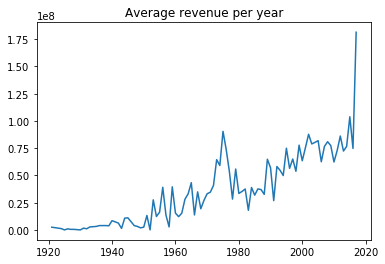

In [268]:
#d1 = train['release_year'].value_counts().sort_index()
d2 = train_new.groupby(['release_year'])['revenue'].mean()
#df=pd.DataFrame({'x1': d1, 'x2': d2})
#plt.plot(d1)
plt.plot(d2)
plt.title("Average revenue per year")
# plt.plot( 'x1', 'x2', data=df, marker='', color='olive', linewidth=2)

In [269]:
#create dummies for dayofweek
master=pd.get_dummies(master, columns=['release_dayofweek'])

Text(0.5, 1.0, 'runtime vs popularity')

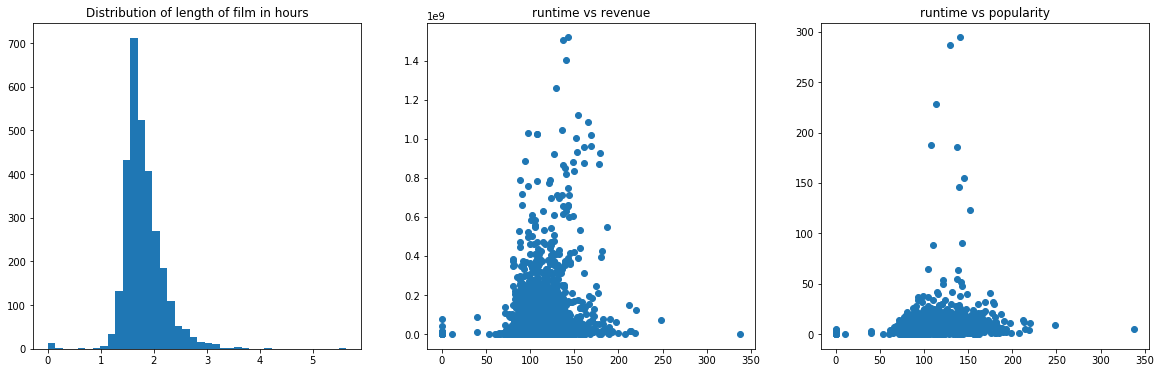

In [270]:
#runtime
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train_new['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train_new['runtime'].fillna(0), train_new['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train_new['runtime'].fillna(0), train_new['popularity'])
plt.title('runtime vs popularity')

In [271]:
#status
train_new['status'].describe()

count         3000
unique           2
top       Released
freq          2996
Name: status, dtype: object

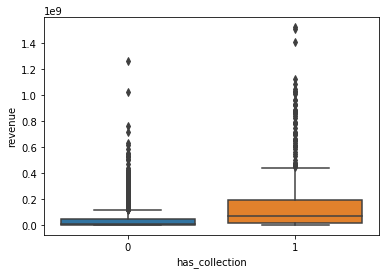

In [272]:
#collections
sns.boxplot(x='has_collection', y='revenue', data=train_new)
plt.show()

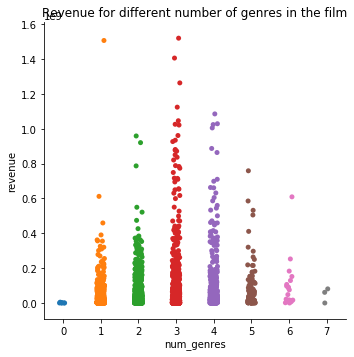

In [273]:
#genres
sns.catplot(x='num_genres', y='revenue', data=train_new);
plt.title('Revenue for different number of genres in the film')
plt.show()

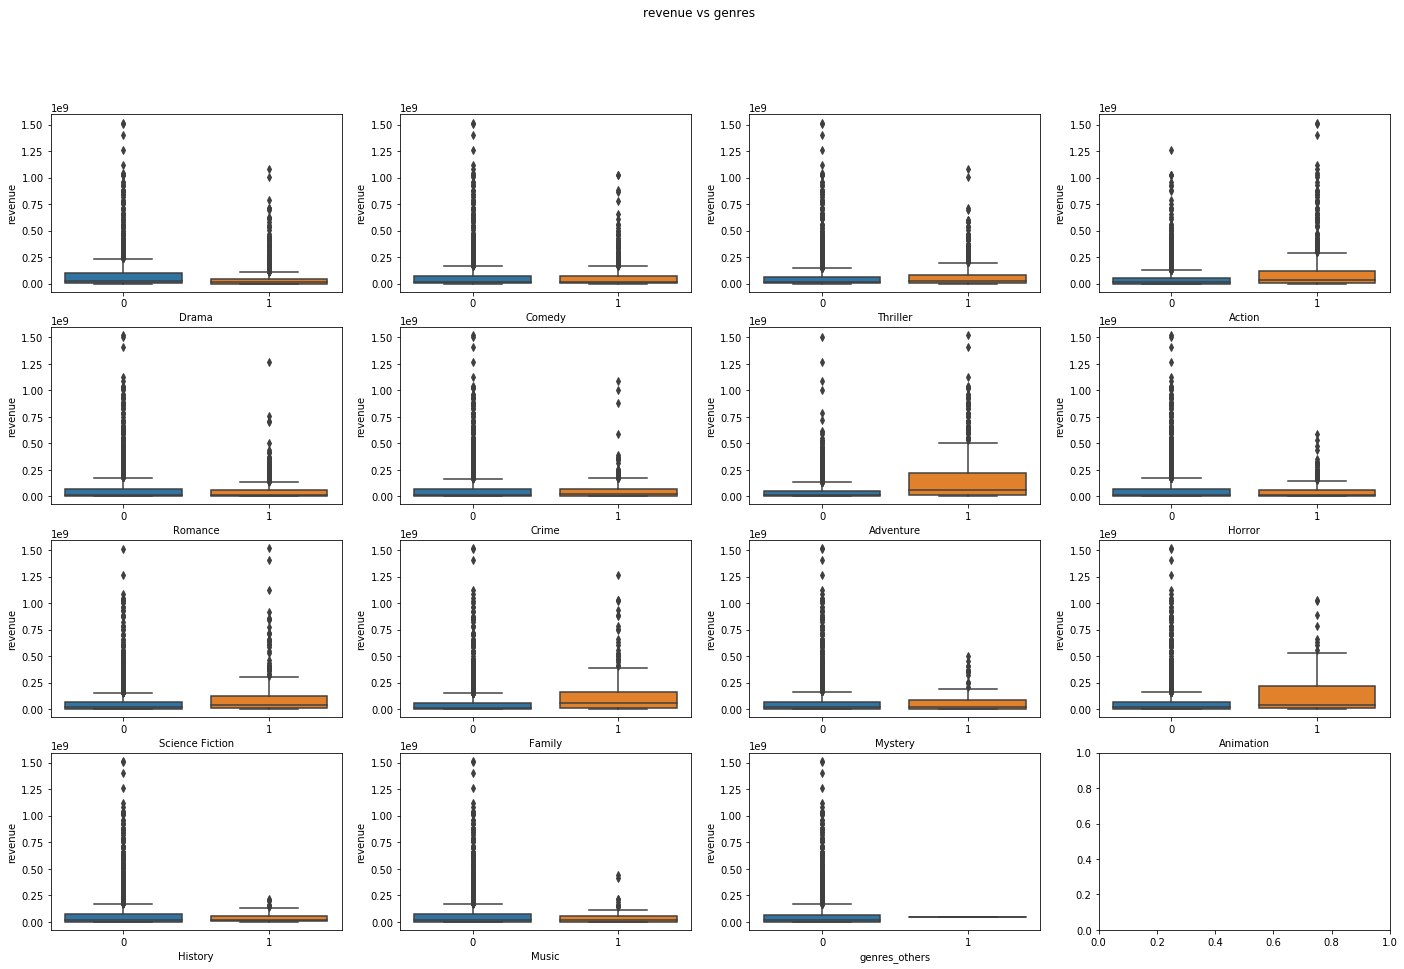

In [274]:
f, axes = plt.subplots(4, 4, figsize=(24, 15))
plt.suptitle('revenue vs genres')
for i, e in enumerate([col for col in ['Drama','Comedy','Thriller','Action','Romance','Crime','Adventure','Horror','Science Fiction','Family','Mystery','Animation','History', 'Music','genres_others']]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 4][i % 4]);

In [275]:
#train.to_excel('train2.xlsx')

In [276]:
train_new.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,dataset,collection_name,has_collection,num_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,genres_others,num_pd_com,pd_com_Warner Bros.,pd_com_Universal Pictures,pd_com_Paramount Pictures,pd_com_Twentieth Century Fox Film Corporation,pd_com_Columbia Pictures,pd_com_Metro-Goldwyn-Mayer (MGM),pd_com_New Line Cinema,pd_com_Touchstone Pictures,pd_com_Walt Disney Pictures,pd_com_Columbia Pictures Corporation,pd_com_Canal+,pd_com_TriStar Pictures,pd_com_Relativity Media,pd_com_United Artists,pd_com_Miramax Films,pd_com_Village Roadshow Pictures,pd_com_Regency Enterprises,pd_com_DreamWorks SKG,pd_com_Fox Searchlight Pictures,pd_com_Amblin Entertainment,pd_com_Lionsgate,pd_com_StudioCanal,pd_com_Working Title Films,pd_com_Dune Entertainment,pd_com_Summit Entertainment,pd_com_Dimension Films,pd_com_BBC Films,pd_com_Orion Pictures,pd_com_Hollywood Pictures,pd_com_Fox 2000 Pictures,pd_com_others,num_pd_cnt,pd_cnt_United States of America,pd_cnt_United Kingdom,pd_cnt_France,pd_cnt_Germany,pd_cnt_Canada,pd_cnt_India,pd_cnt_Italy,pd_cnt_Japan,pd_cnt_Australia,pd_cnt_Spain,pd_cnt_Russia,pd_cnt_China,pd_cnt_Hong Kong,pd_cnt_Belgium,pd_cnt_Ireland,pd_cnt_South Korea,pd_cnt_Sweden,pd_cnt_Mexico,pd_cnt_Netherlands,pd_cnt_Denmark,pd_cnt_New Zealand,pd_cnt_Czech Republic,pd_cnt_Switzerland,pd_cnt_South Africa,pd_cnt_Brazil,pd_cnt_others,num_lg,lg_English,lg_Français,lg_Español,lg_Deutsch,lg_Pусский,lg_Italiano,lg_日本語,lg_普通话,lg_हिन्दी,lg_,lg_العربية,lg_Português,lg_广州话 / 廣州話,lg_한국어/조선말,lg_Polski,lg_Latin,lg_Magyar,lg_Český,lg_ภาษาไทย,lg_தமிழ்,lg_svenska,lg_עִבְרִית,lg_Türkçe,lg_ελληνικά,lg_Dansk,lg_Nederlands,lg_اردو,lg_Română,lg_Tiếng Việt,lg_Norsk,lg_others,num_key,key_woman director,key_independent film,key_duringcreditsstinger,key_based on novel,key_murder,key_violence,key_love,key_revenge,key_sex,key_aftercreditsstinger,key_biography,key_sport,key_friendship,key_dystopia,key_police,key_suspense,key_sequel,key_nudity,key_musical,key_teenager,key_female nudity,key_drug,key_los angeles,key_new york,key_prison,key_3d,key_high school,key_family,key_alien,key_world war ii,key_others,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Bruce Willis,cast_name_Morgan Freeman,cast_name_Liam Neeson,cast_name_Willem Dafoe,cast_name_Steve Buscemi,cast_name_Sylvester Stallone,cast_name_Nicolas Cage,cast_name_Matt Damon,cast_name_J.K. Simmons,cast_name_John Goodman,cast_name_Julianne Moore,cast_name_Christopher Walken,cast_name_Robin Williams,genders_0_cast,genders_1_cast,genders_2_cast,cast_chr_,cast_chr_Himself,cast_chr_Herself,cast_chr_Dancer,cast_chr_Additional Voices (voice),cast_chr_Doctor,cast_chr_Reporter,cast_chr_Nurse,cast_chr_Waitress,cast_chr_Bartender,cast_chr_Priest,cast_chr_Soldier,cast_chr_Security Guard,cast_chr_(uncredited),cast_chr_Cop,num_crew,crew_name_Avy Kaufman,crew_name_Steven Spielberg,crew_name_Robert Rodriguez,crew_name_Mary Vernieu,crew_name_Deborah Aquila,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Hans Zimmer,crew_name_Tricia Wood,crew_name_James Newton Howard,crew_name_James Horner,crew_name_Luc Besson,crew_name_Francine Maisler,crew_name_Kerry Barden,crew_name_Jerry Goldsmith,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,deps_Production,deps_Sound,deps_Art,deps_Crew,deps_Writing,deps_Costume & Make-Up,deps_Camera,deps_Directing,deps_Editing,deps_Visual Effects,deps_Lighting,deps_Actors,release_month,release_day,release_year,release_dayofweek,release_quarter
0,1,14000000,NaN,tt263729

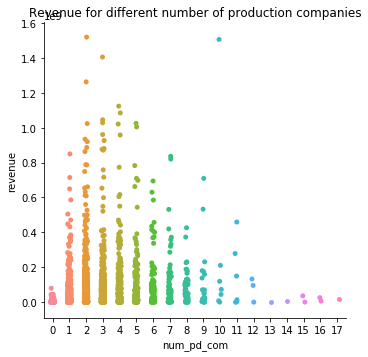

In [277]:
#production companies
sns.catplot(x='num_pd_com', y='revenue', data=train_new);
plt.title('Revenue for different number of production companies')
plt.show()

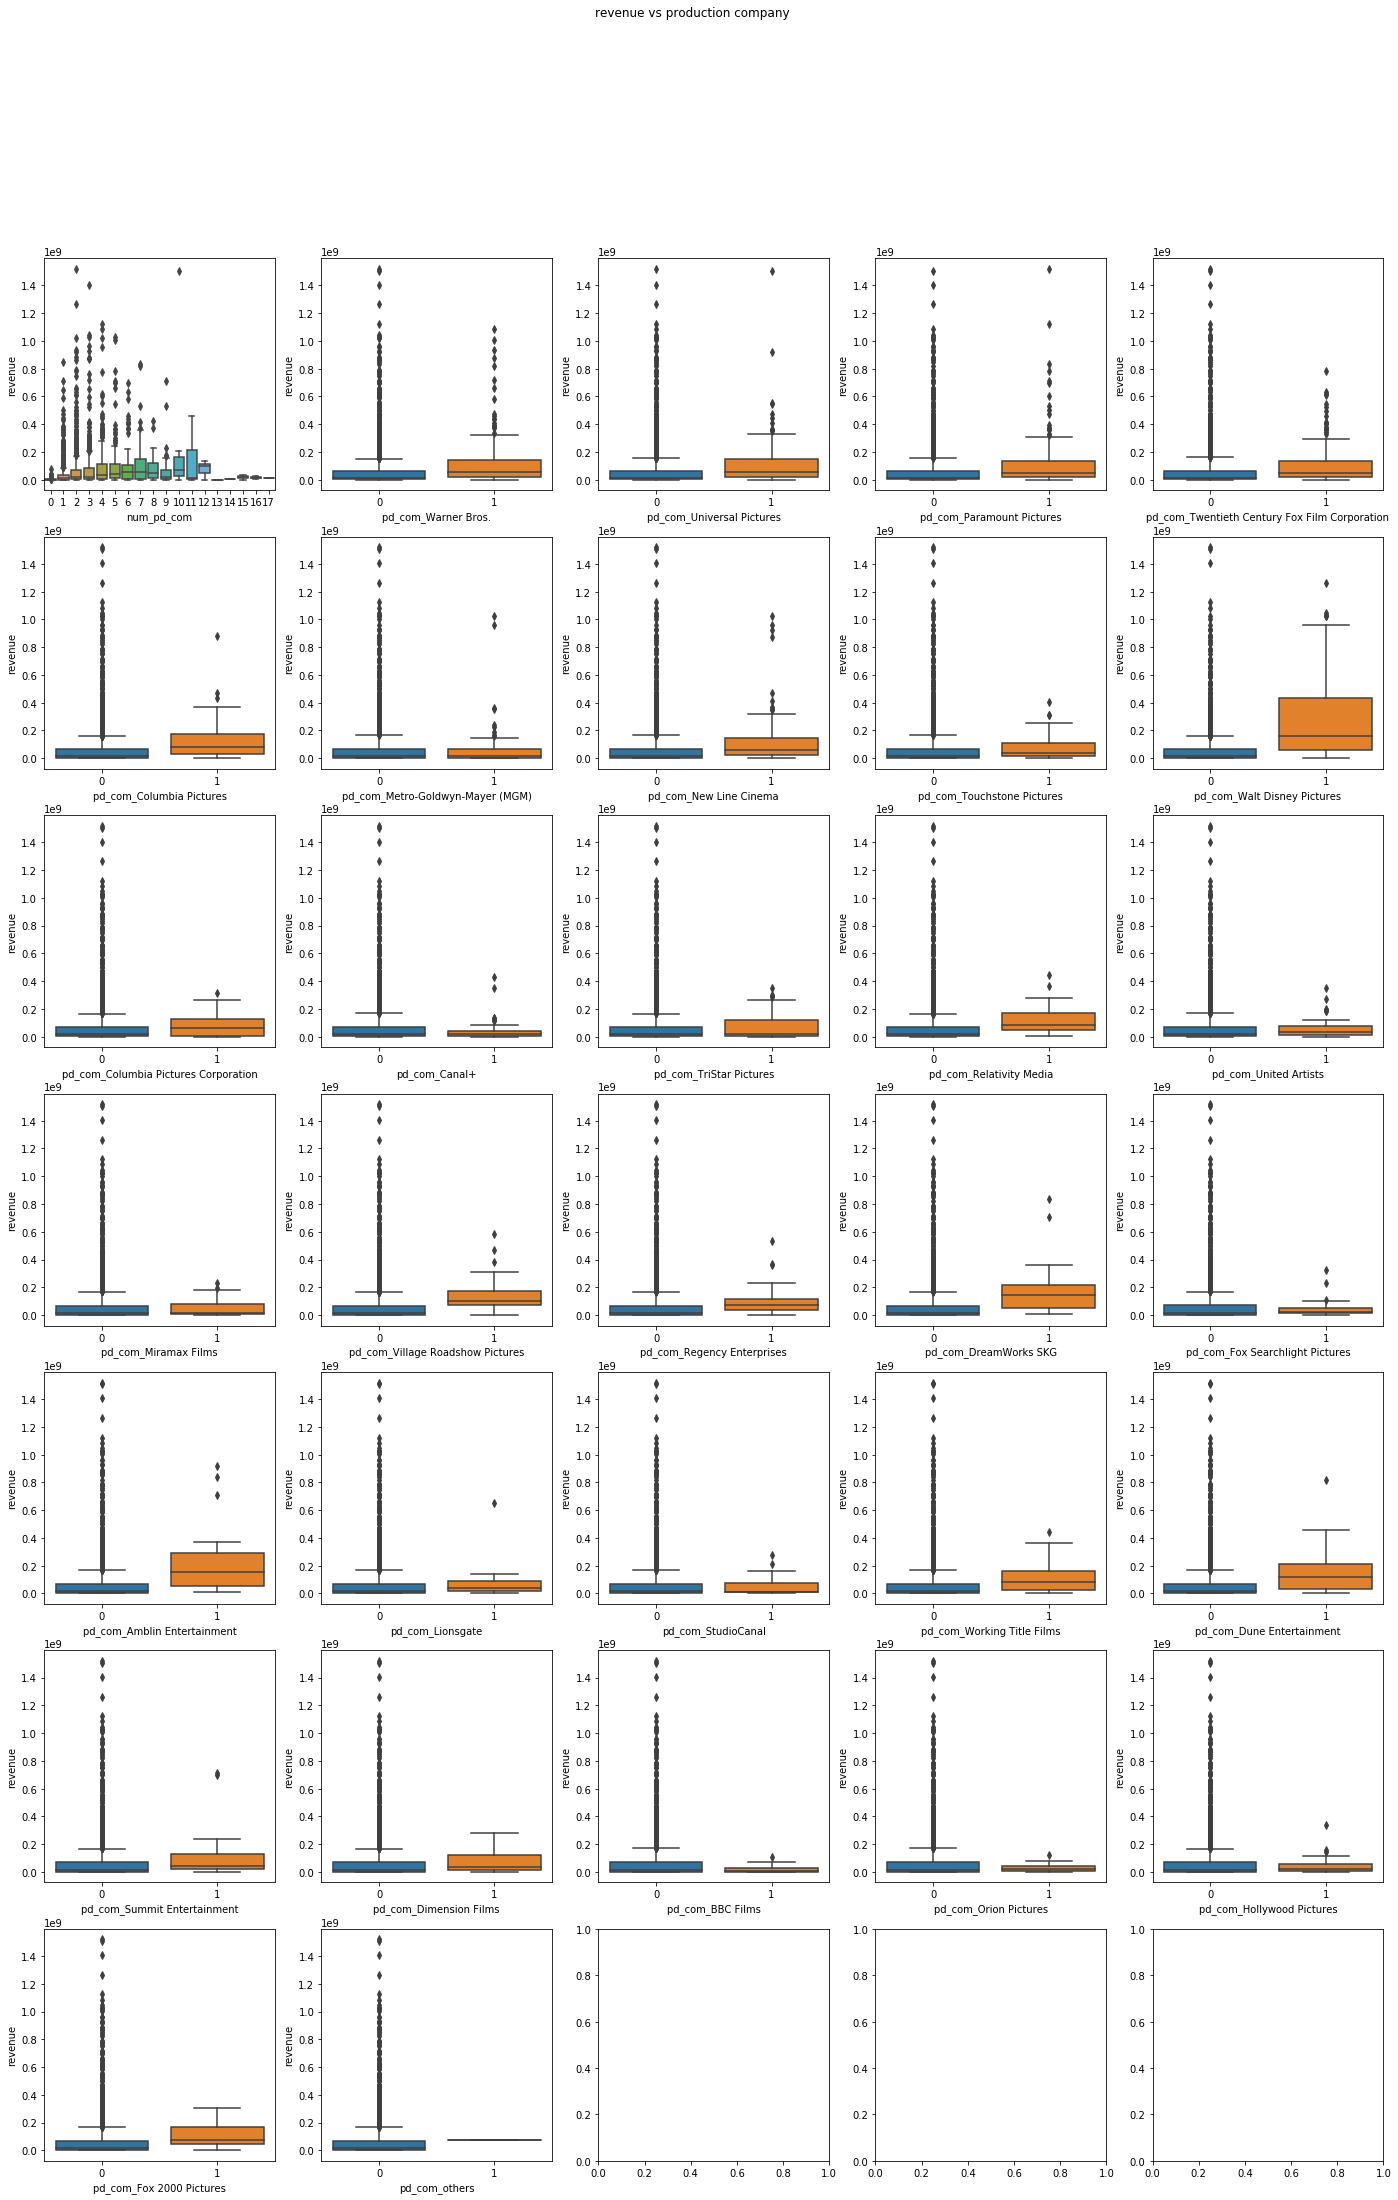

In [278]:
f, axes = plt.subplots(7, 5, figsize=(24, 35))
plt.suptitle('revenue vs production company')
for i, e in enumerate([col for col in train_new.columns if 'pd_com' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

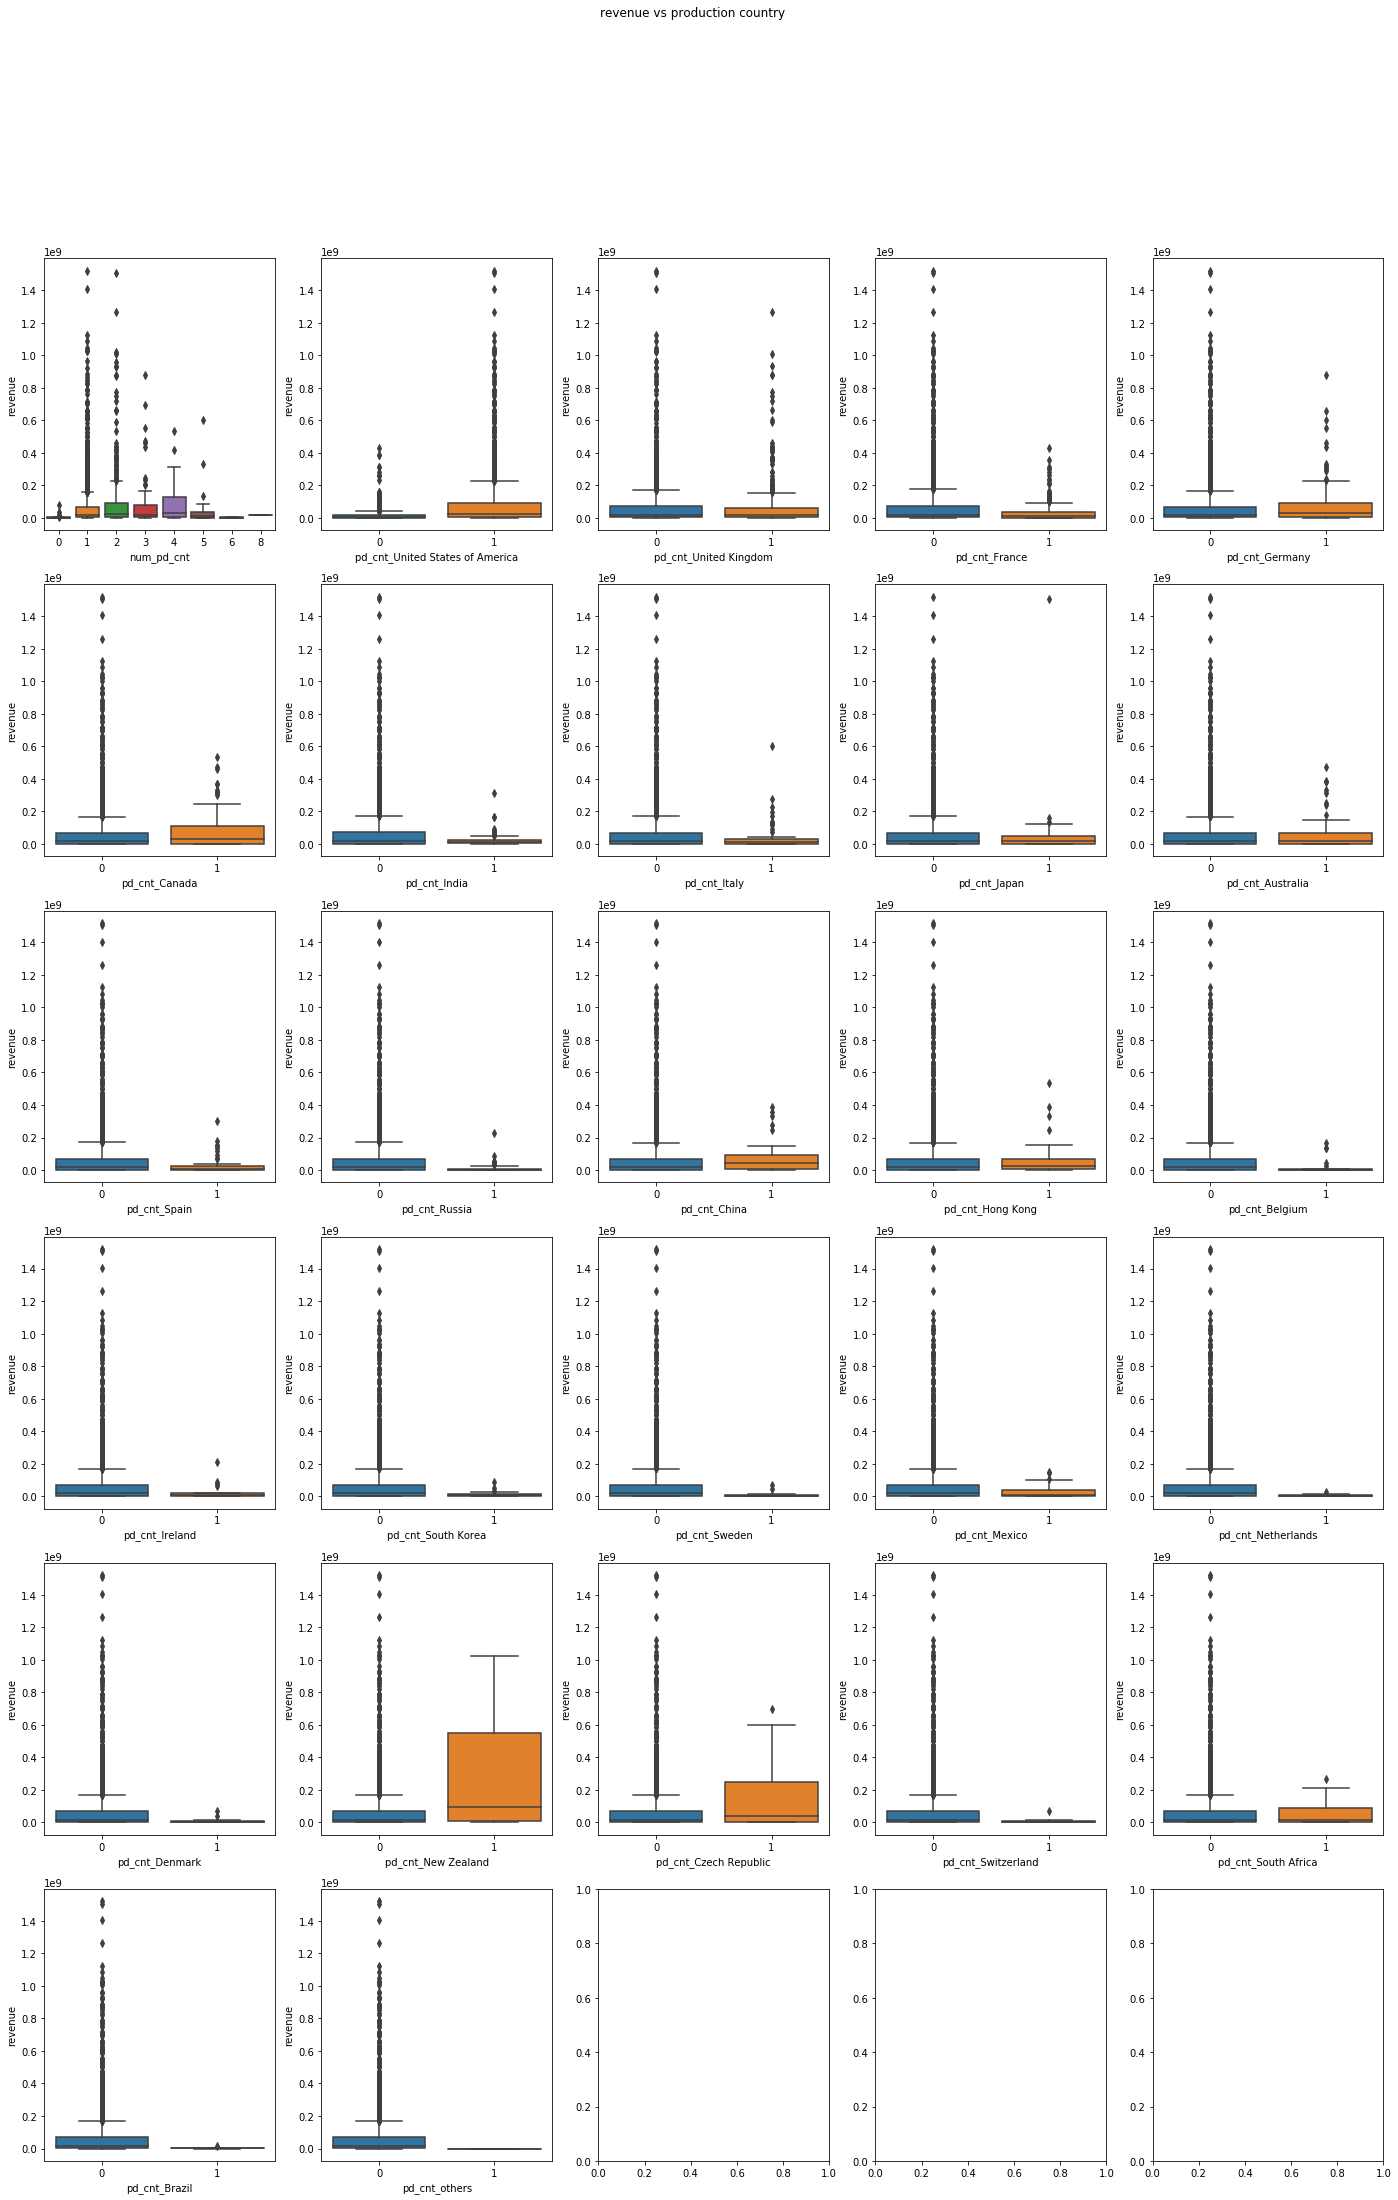

In [279]:
#production countries
f, axes = plt.subplots(6, 5, figsize=(24, 35))
plt.suptitle('revenue vs production country')
for i, e in enumerate([col for col in train_new.columns if 'pd_cnt' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

Text(0.5, 1.0, 'Number of cast members vs revenue')

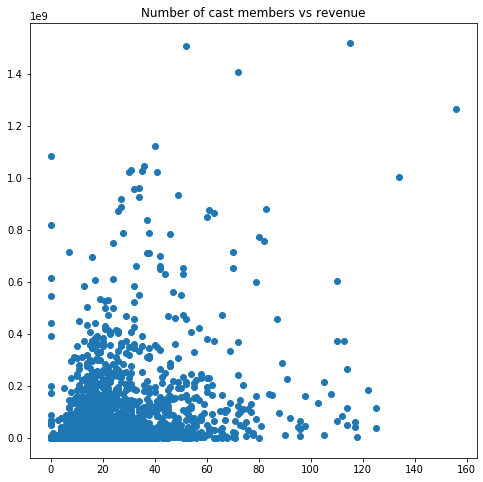

In [280]:
#cast
plt.figure(figsize=(8, 8))
plt.scatter(train_new['num_cast'], train_new['revenue'])
plt.title('Number of cast members vs revenue')

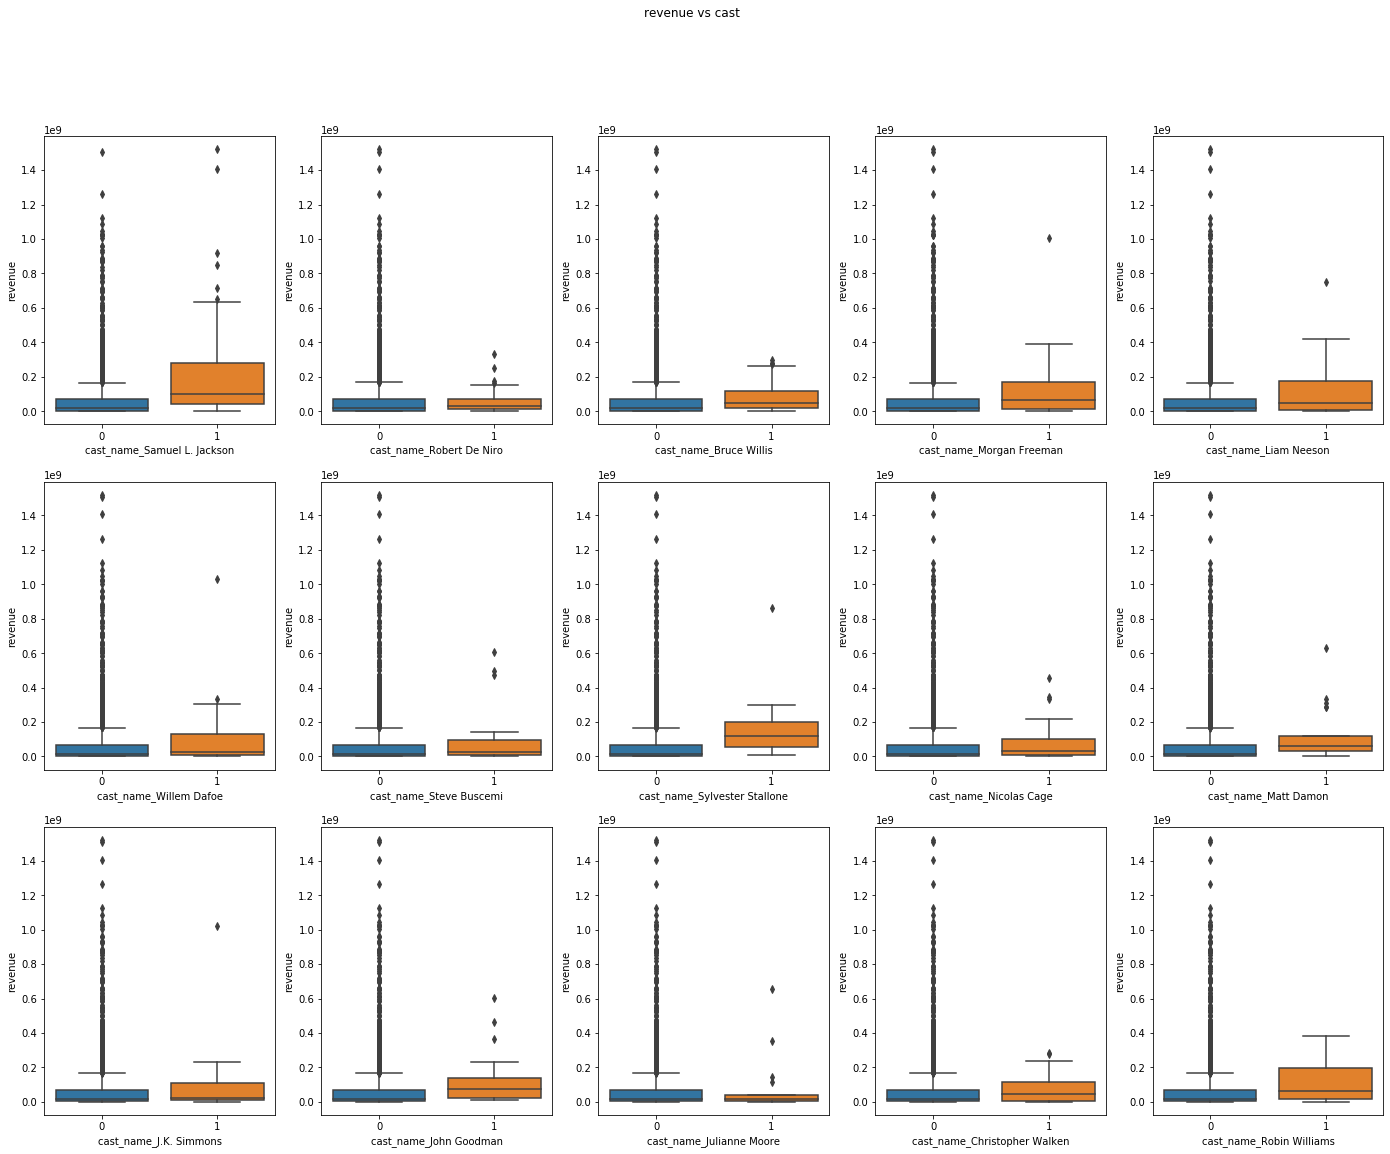

In [281]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('revenue vs cast')
for i, e in enumerate([col for col in train_new.columns if 'cast_name' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

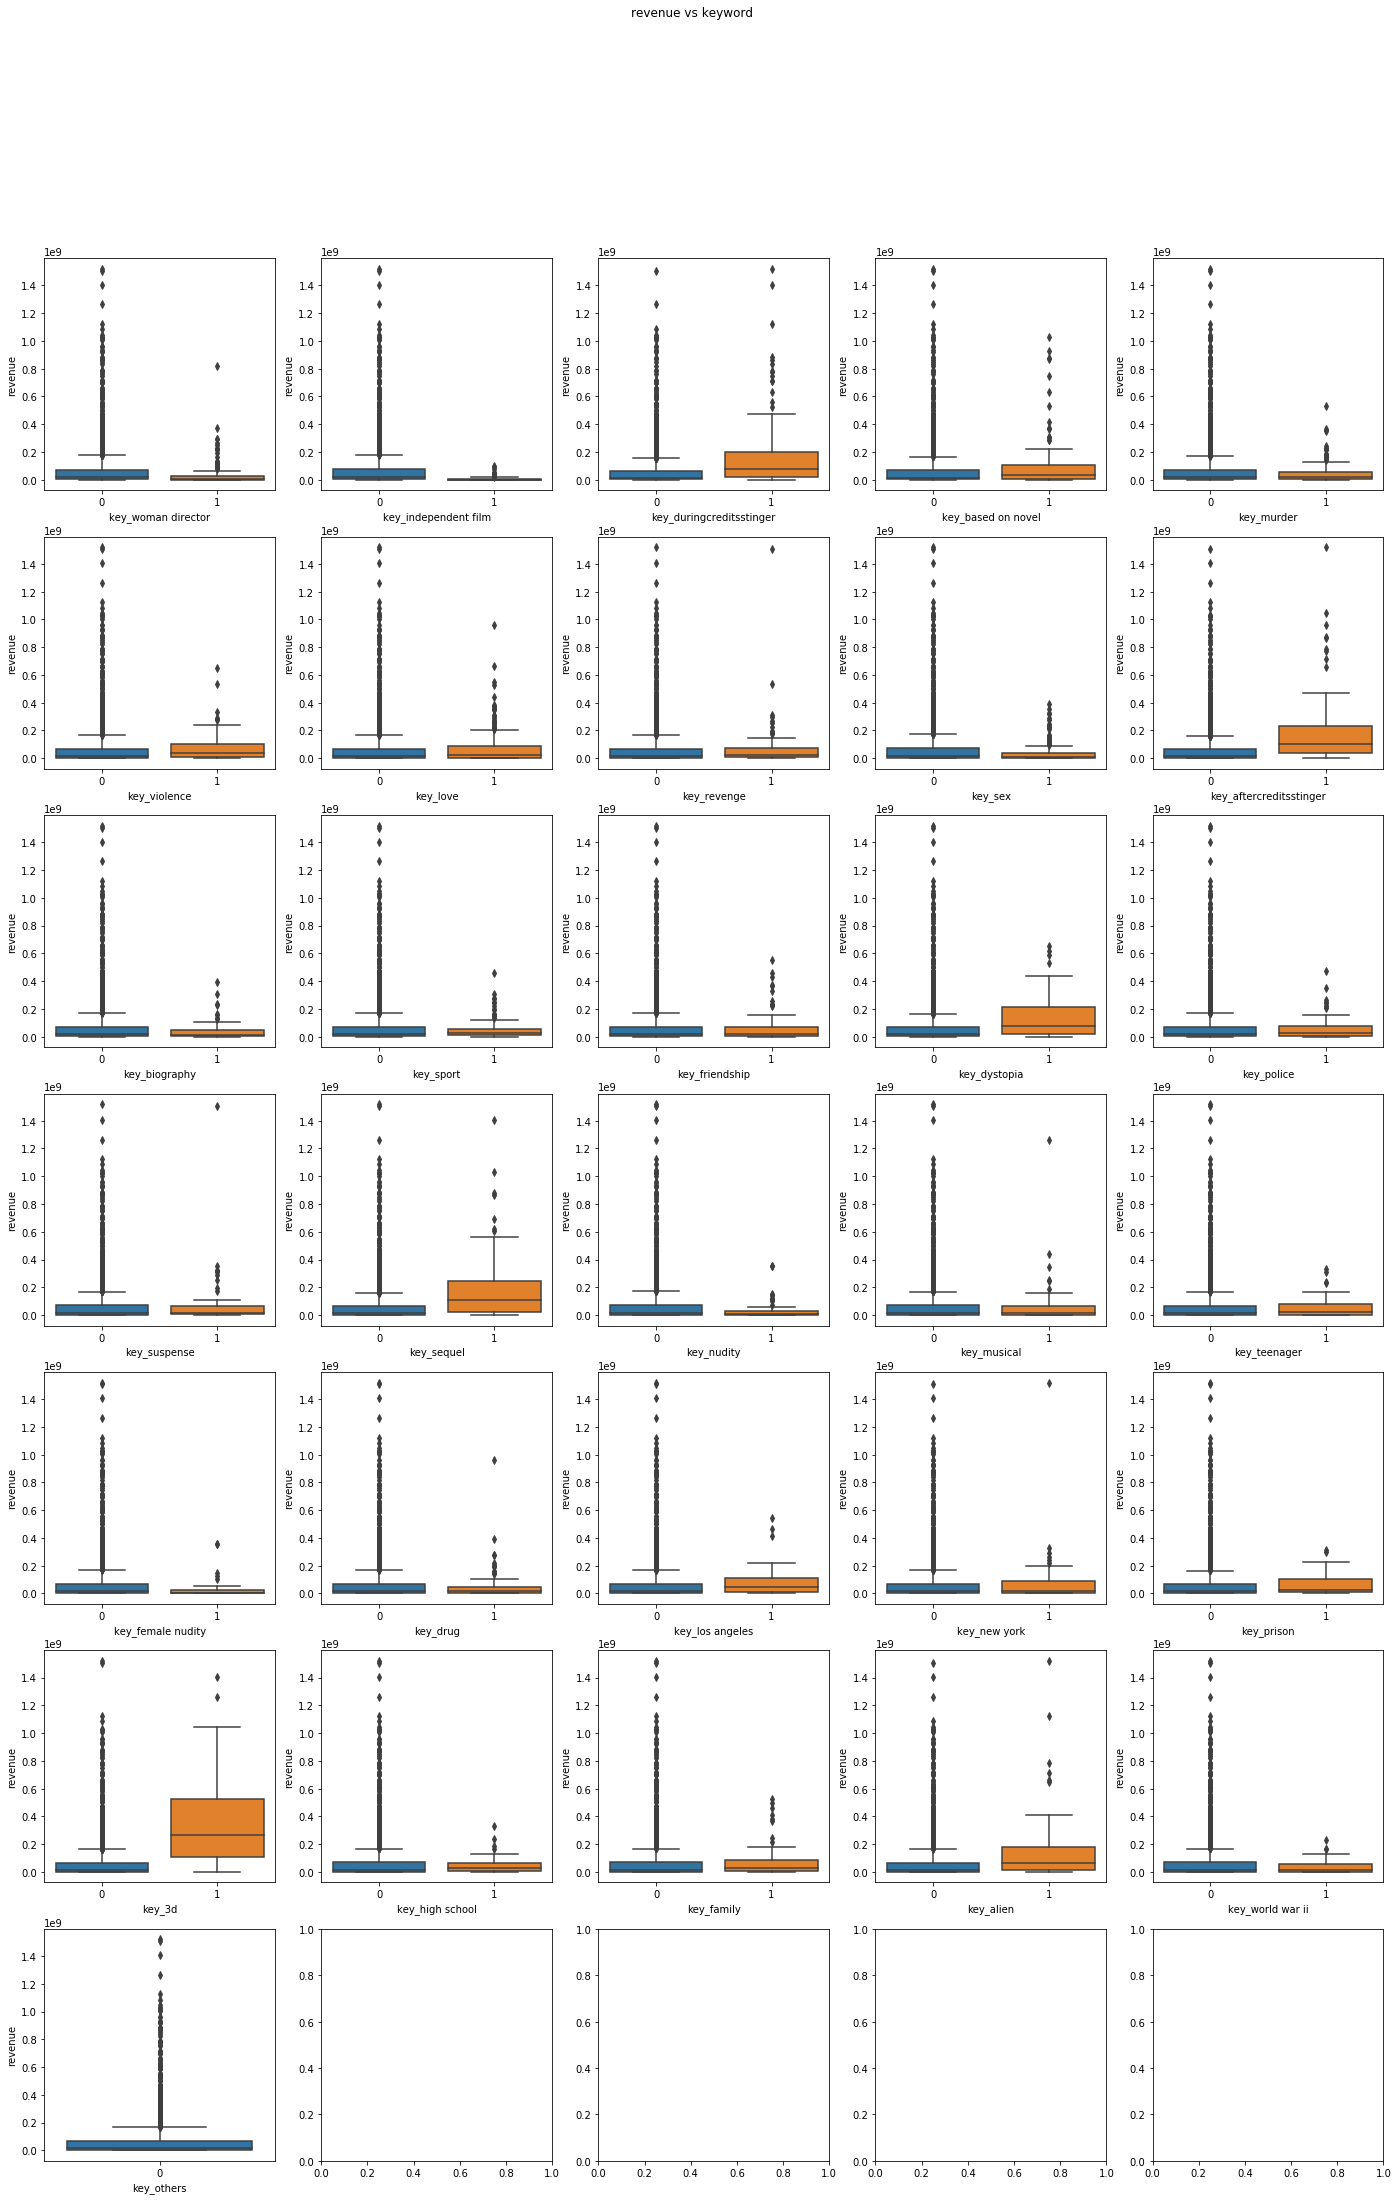

In [282]:
#Keywords
f, axes = plt.subplots(7, 5, figsize=(24, 35))
plt.suptitle('revenue vs keyword')
for i, e in enumerate([col for col in train_new.columns if 'key_' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

Text(0.5, 1.0, 'Number of crew members vs revenue')

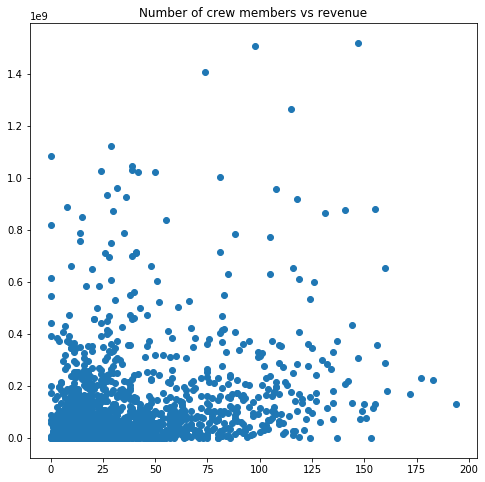

In [283]:
#crew
plt.figure(figsize=(8, 8))
plt.scatter(train_new['num_crew'], train_new['revenue'])
plt.title('Number of crew members vs revenue')


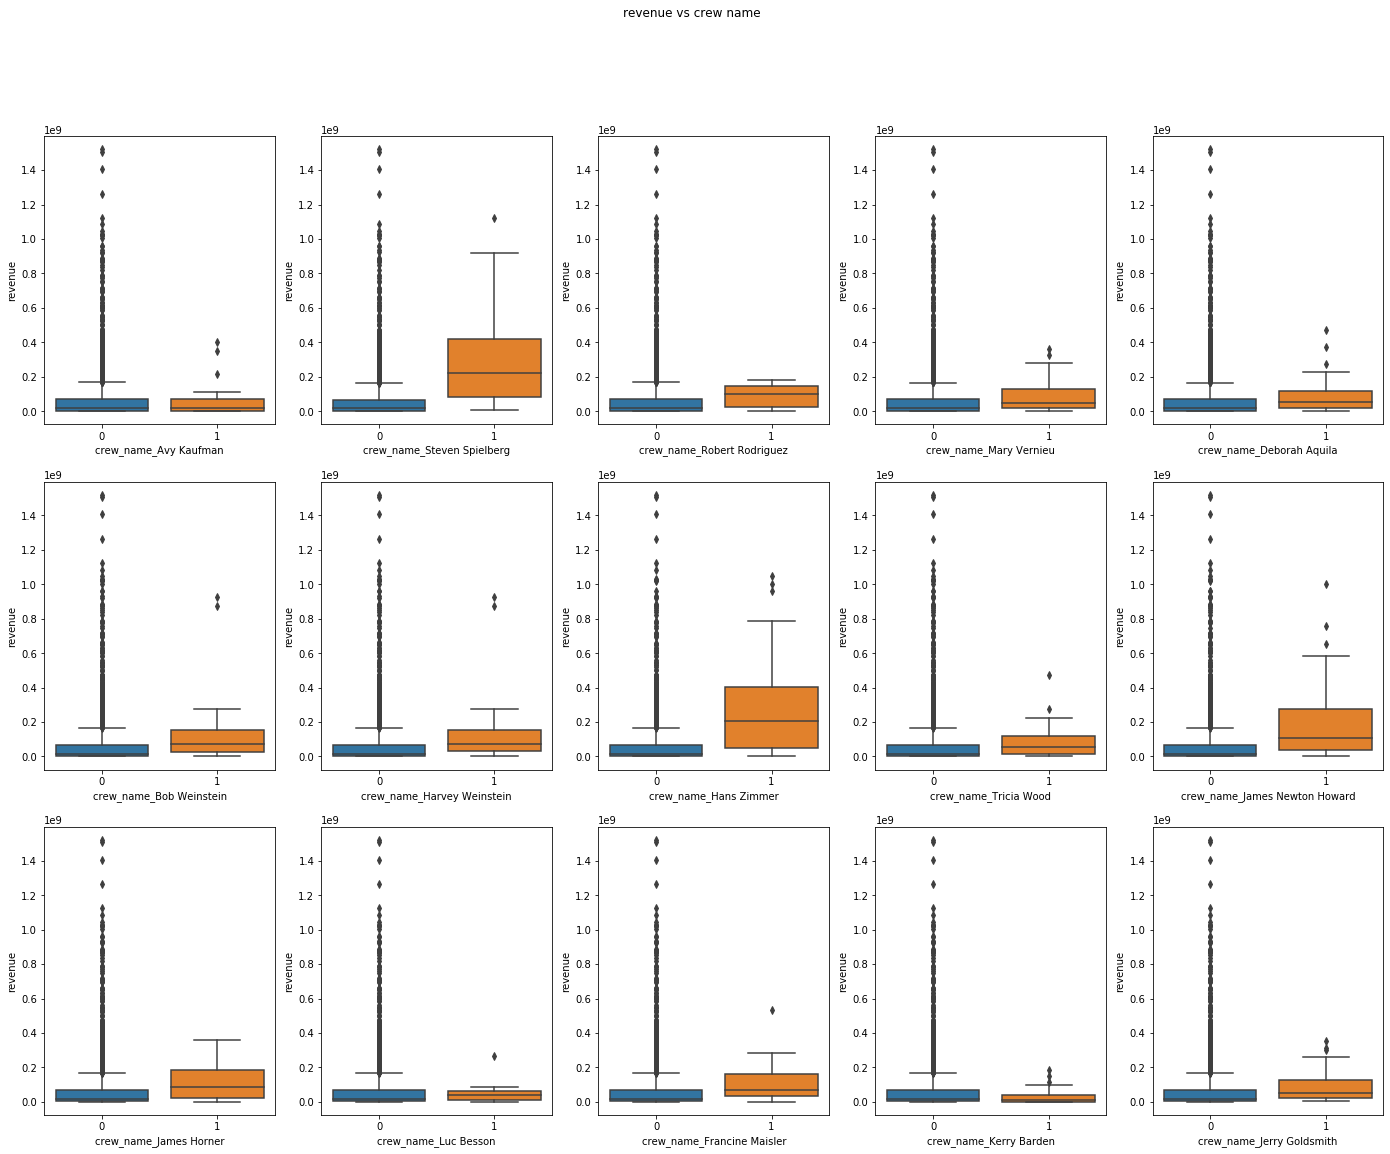

In [284]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('revenue vs crew name')
for i, e in enumerate([col for col in train_new.columns if 'crew_name_' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

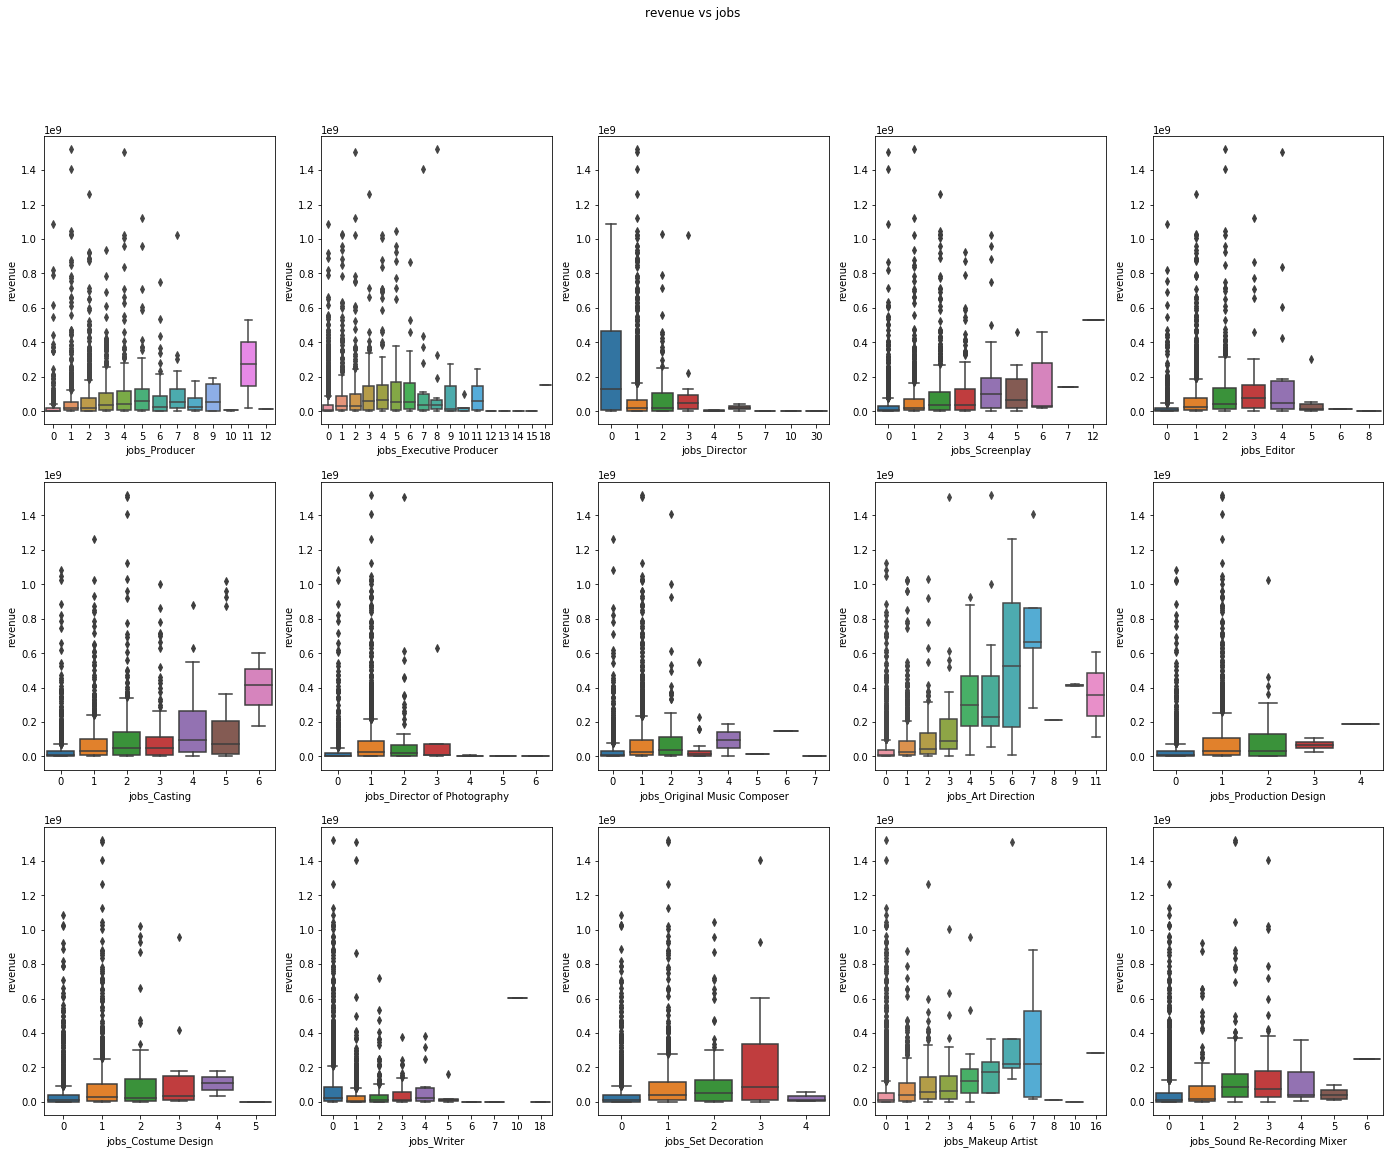

In [285]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('revenue vs jobs')
for i, e in enumerate([col for col in train_new.columns if 'jobs_' in col]):
    sns.boxplot(x=e, y='revenue', data=train_new, ax=axes[i // 5][i % 5]);

In [286]:
#drop columns
master = master.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status','release_month','release_day','release_year','release_quarter'], axis=1)
# test = test.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status'], axis=1)
master = master.set_index('id')

In [287]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [288]:
master = master.drop(['original_language','original_title','overview','tagline','title','collection_name'], axis=1)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 1 to 7398
Columns: 233 entries, budget to release_dayofweek_6
dtypes: float64(3), int64(222), object(1), uint8(7)
memory usage: 12.9+ MB


In [289]:
#master.fillna(0)

In [290]:
master.isnull().values.any()

True

In [291]:
master.isnull().sum().sum()

4404

In [292]:
# train_new=master[master['dataset']=='train']
# # Basic correlogram
# sns.pairplot(train_new)
# sns.plt.show()

In [309]:
train_fin=master[master['dataset']=='train']
train_fin = train_fin.drop(['dataset'], axis=1)

train_fin.fillna(0)

train_fin=train_fin[:,[0:100]]

df_X_train=train_fin.loc[:, train_fin.columns != 'revenue']
df_y_train=train_fin['revenue']

#df_y_train.head()
X=df_X_train.values
y=df_y_train.values

SyntaxError: invalid syntax (<ipython-input-309-b77fffed8353>, line 6)

In [306]:
train_fin.isnull().values.any()

False

In [305]:
train_fin.isnull().sum().sum()

0

In [296]:
train_fin.isnull().any()

budget                                           False
popularity                                       False
runtime                                           True
revenue                                          False
has_collection                                   False
num_genres                                       False
Drama                                            False
Comedy                                           False
Thriller                                         False
Action                                           False
Romance                                          False
Adventure                                        False
Crime                                            False
Science Fiction                                  False
Horror                                           False
Family                                           False
Fantasy                                          False
Mystery                                          False
Animation 

In [301]:
train_fin['runtime'].fillna(0,inplace=True)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [307]:
train_fin.describe()

,budget,popularity,runtime,revenue,has_collection,num_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,genres_others,num_pd_com,pd_com_Warner Bros.,pd_com_Universal Pictures,pd_com_Paramount Pictures,pd_com_Twentieth Century Fox Film Corporation,pd_com_Columbia Pictures,pd_com_Metro-Goldwyn-Mayer (MGM),pd_com_New Line Cinema,pd_com_Touchstone Pictures,pd_com_Walt Disney Pictures,pd_com_Columbia Pictures Corporation,pd_com_Canal+,pd_com_TriStar Pictures,pd_com_Relativity Media,pd_com_United Artists,pd_com_Miramax Films,pd_com_Village Roadshow Pictures,pd_com_Regency Enterprises,pd_com_DreamWorks SKG,pd_com_Fox Searchlight Pictures,pd_com_Amblin Entertainment,pd_com_Lionsgate,pd_com_StudioCanal,pd_com_Working Title Films,pd_com_Dune Entertainment,pd_com_Summit Entertainment,pd_com_Dimension Films,pd_com_BBC Films,pd_com_Orion Pictures,pd_com_Hollywood Pictures,pd_com_Fox 2000 Pictures,pd_com_others,num_pd_cnt,pd_cnt_United States of America,pd_cnt_United Kingdom,pd_cnt_France,pd_cnt_Germany,pd_cnt_Canada,pd_cnt_India,pd_cnt_Italy,pd_cnt_Japan,pd_cnt_Australia,pd_cnt_Spain,pd_cnt_Russia,pd_cnt_China,pd_cnt_Hong Kong,pd_cnt_Belgium,pd_cnt_Ireland,pd_cnt_South Korea,pd_cnt_Sweden,pd_cnt_Mexico,pd_cnt_Netherlands,pd_cnt_Denmark,pd_cnt_New Zealand,pd_cnt_Czech Republic,pd_cnt_Switzerland,pd_cnt_South Africa,pd_cnt_Brazil,pd_cnt_others,num_lg,lg_English,lg_Français,lg_Español,lg_Deutsch,lg_Pусский,lg_Italiano,lg_日本語,lg_普通话,lg_हिन्दी,lg_,lg_العربية,lg_Português,lg_广州话 / 廣州話,lg_한국어/조선말,lg_Polski,lg_Latin,lg_Magyar,lg_Český,lg_ภาษาไทย,lg_தமிழ்,lg_svenska,lg_עִבְרִית,lg_Türkçe,lg_ελληνικά,lg_Dansk,lg_Nederlands,lg_اردو,lg_Română,lg_Tiếng Việt,lg_Norsk,lg_others,num_key,key_woman director,key_independent film,key_duringcreditsstinger,key_based on novel,key_murder,key_violence,key_love,key_revenge,key_sex,key_aftercreditsstinger,key_biography,key_sport,key_friendship,key_dystopia,key_police,key_suspense,key_sequel,key_nudity,key_musical,key_teenager,key_female nudity,key_drug,key_los angeles,key_new york,key_prison,key_3d,key_high school,key_family,key_alien,key_world war ii,key_others,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Bruce Willis,cast_name_Morgan Freeman,cast_name_Liam Neeson,cast_name_Willem Dafoe,cast_name_Steve Buscemi,cast_name_Sylvester Stallone,cast_name_Nicolas Cage,cast_name_Matt Damon,cast_name_J.K. Simmons,cast_name_John Goodman,cast_name_Julianne Moore,cast_name_Christopher Walken,cast_name_Robin Williams,genders_0_cast,genders_1_cast,genders_2_cast,cast_chr_,cast_chr_Himself,cast_chr_Herself,cast_chr_Dancer,cast_chr_Additional Voices (voice),cast_chr_Doctor,cast_chr_Reporter,cast_chr_Nurse,cast_chr_Waitress,cast_chr_Bartender,cast_chr_Priest,cast_chr_Soldier,cast_chr_Security Guard,cast_chr_(uncredited),cast_chr_Cop,num_crew,crew_name_Avy Kaufman,crew_name_Steven Spielberg,crew_name_Robert Rodriguez,crew_name_Mary Vernieu,crew_name_Deborah Aquila,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Hans Zimmer,crew_name_Tricia Wood,crew_name_James Newton Howard,crew_name_James Horner,crew_name_Luc Besson,crew_name_Francine Maisler,crew_name_Kerry Barden,crew_name_Jerry Goldsmith,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,deps_Production,deps_Sound,deps_Art,deps_Crew,deps_Writing,deps_Costume & Make-Up,deps_Camera,deps_Directing,deps_Editing,deps_Visual Effects,deps_Lighting,deps_Actors,release_dayofweek_0,release_dayofweek_1,release_dayofweek_2,release_dayofweek_3,release_dayofweek_4,release_dayofweek_5,release_dayofweek_6
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.00000